- Test Dataset to validate the TT-HODMD code algorithms:
$$\forall x \in [-3,3], \forall t \in [0,4\pi]$$
1. Simple and linear function
$$ f(x,t) = x + t $$
2. Simple and non-linear function
$$ f(x,t) = x^2 + t^2 $$
3. More complex function
$$ f(x,t) = \exp(-x^2/5)\cos(2x)\sqrt{(1+\sin(t)/2)}$$


In [1]:
import sys 
sys.path.append('../src/')
from lib import*

In [2]:

x,t = np.linspace(-3,3,400),np.linspace(0,4*np.pi,1000)
dt = t[1]-t[0]
dx = x[1]-x[0]
X_grid, T_grid = np.meshgrid(x,t,indexing="ij")
f1 = X_grid + T_grid
f2 = X_grid**2 + T_grid**2
f3 = np.exp(-X_grid**2/5)*np.cos(2*X_grid)*np.sqrt(1+np.sin(T_grid)/2)
f = [f1,f2,f3]
delay = 2 # we will use this number of delays for the HODMD

# add noise to the data 
mean = 0
std_dev = 0.2
errbound = 0.1
random_matrix = errbound*np.random.normal(mean, std_dev, size=(400, 1000))
f1_noise = f1 + random_matrix
f2_noise = f2 + random_matrix
f3_noise = f3 + random_matrix
f_noise = [f1_noise,f2_noise,f3_noise]
title = [r"$ f(x,t) = x + t $",r"$ f(x,t) = x^2 + t^2 $",r"$ f(x,t) = e^{-x^2/5}\cos(2x)\sqrt{1+\sin(t)/2} $"]
title_noise = [r"$ f(x,t) = x + t + \epsilon $",r"$ f(x,t) = x^2 + t^2 + \epsilon $",r"$ f(x,t) = e^{-x^2/5}\cos(2x)\sqrt{1+\sin(t)/2} + \epsilon $"]


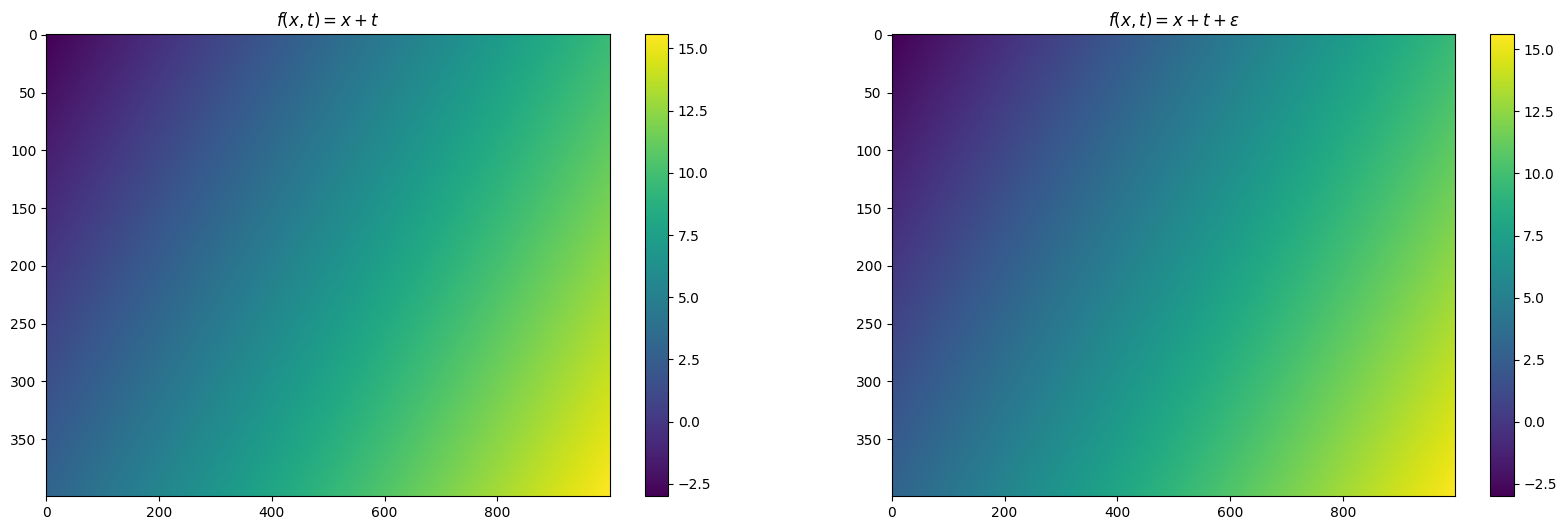

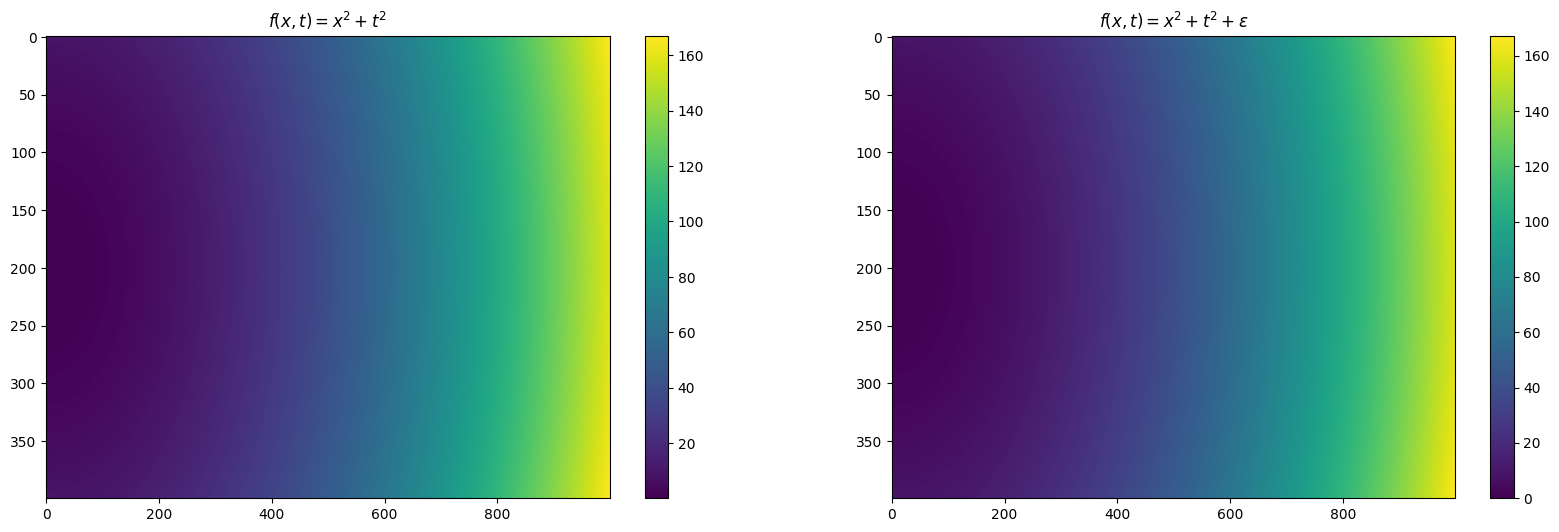

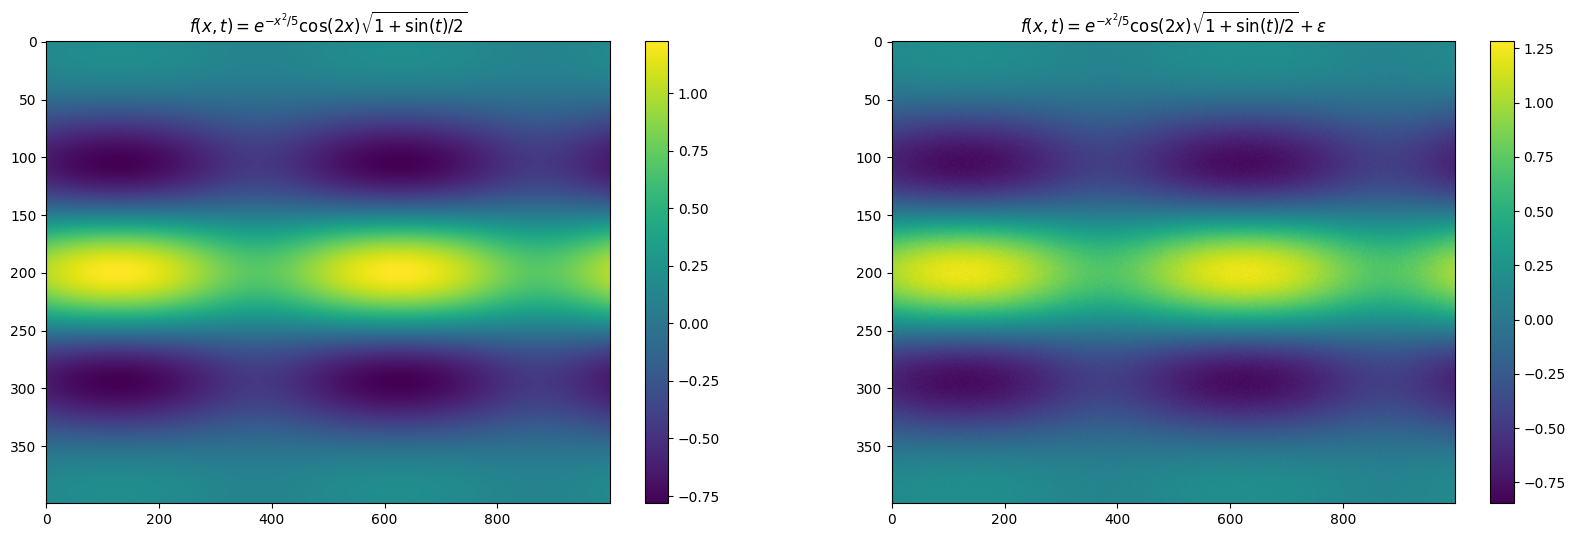

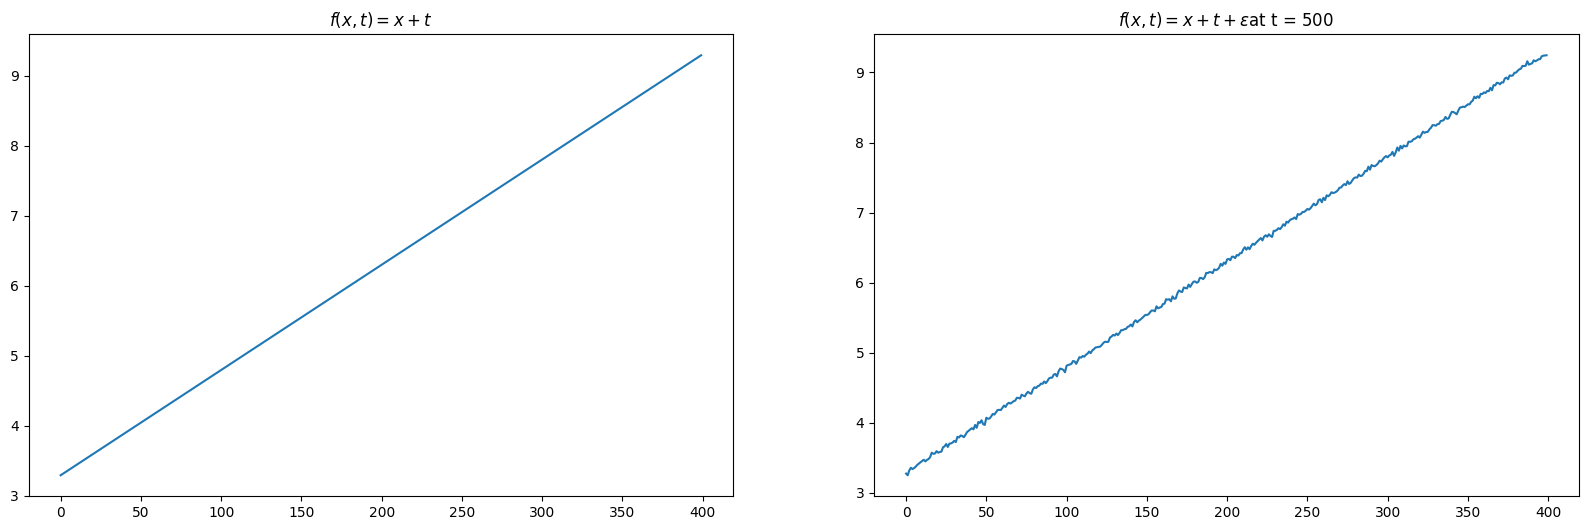

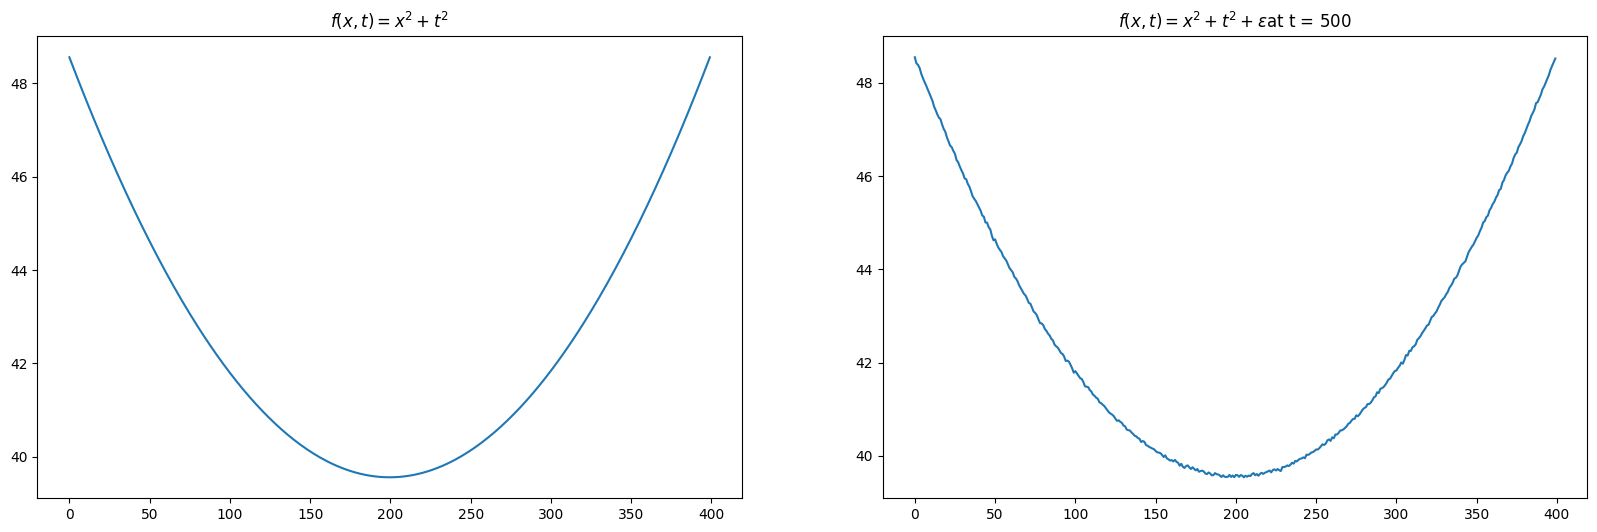

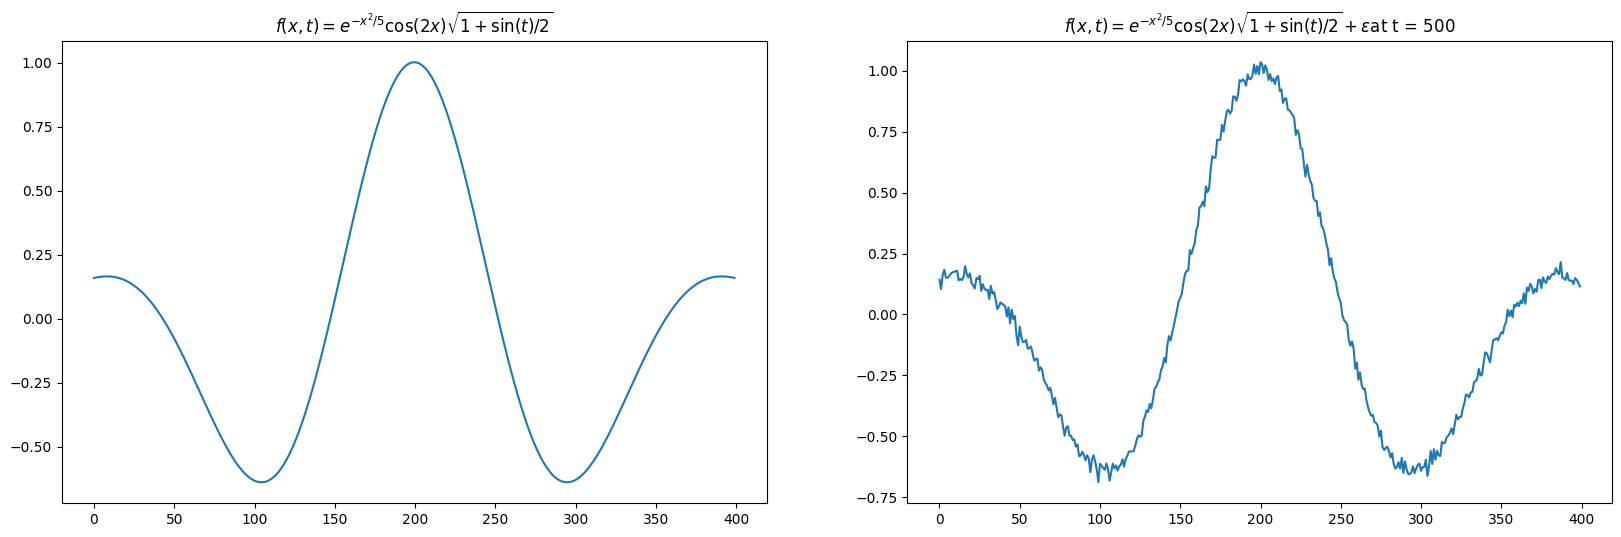

In [3]:


for i in range(3):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.imshow(f[i],aspect="auto")
    plt.colorbar()
    plt.title(title[i])

    plt.subplot(1,2,2)
    plt.imshow(f_noise[i],aspect="auto")
    plt.colorbar()
    plt.title(title_noise[i])
plt.show()

for i in range(3):
    x_1 = f[i].shape[1]//2
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.plot(f[i][:,x_1])
    plt.title(title[i])
    plt.subplot(1,2,2)
    plt.plot(f_noise[i][:,x_1])
    plt.title(title_noise[i]+f"at t = {x_1}")

In [4]:
# Define spatial and temporal grids
xi = np.linspace(-10, 10, 1000)
t = np.linspace(0, 4*np.pi, 400)

# Create meshgrid
X_grid, T_grid = np.meshgrid(xi, t)

# Define patterns
f1 = X_grid + T_grid
f2 = X_grid**2 + T_grid**2
f3 = np.exp(-X_grid**2/5) * np.cos(2*X_grid) * np.sqrt(1 + np.sin(T_grid)/2)

# Run DMD on one of the fields


# Idea of computational using tensor train 
- Get big matrix data 
- Transform the matrix into tensor 
- Use tensor train to compress the tensor 
- To find tensor $A$ given tensor data $X_1,X_2$ such that $X_1 = AX_2$
- Use left orthogonalization to find $A$, to reduce complexity

In [2]:
from lib import*
dynamic_mode_decomposition(xi, t, f1, r=100,indices = [170,])


NameError: name 'xi' is not defined

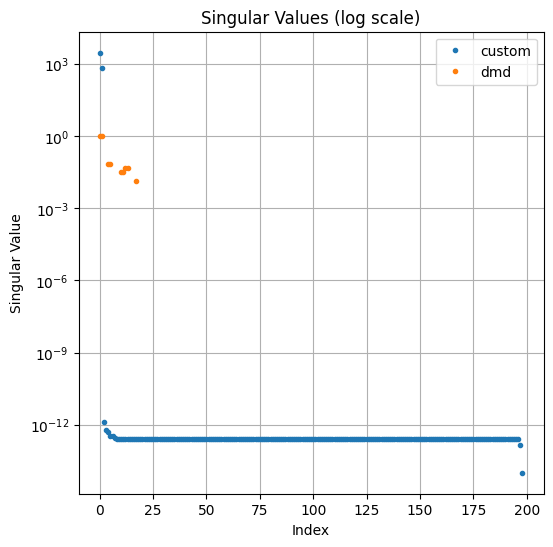

ValueError: x and y must have same first dimension, but have shapes (400,) and (1000,)

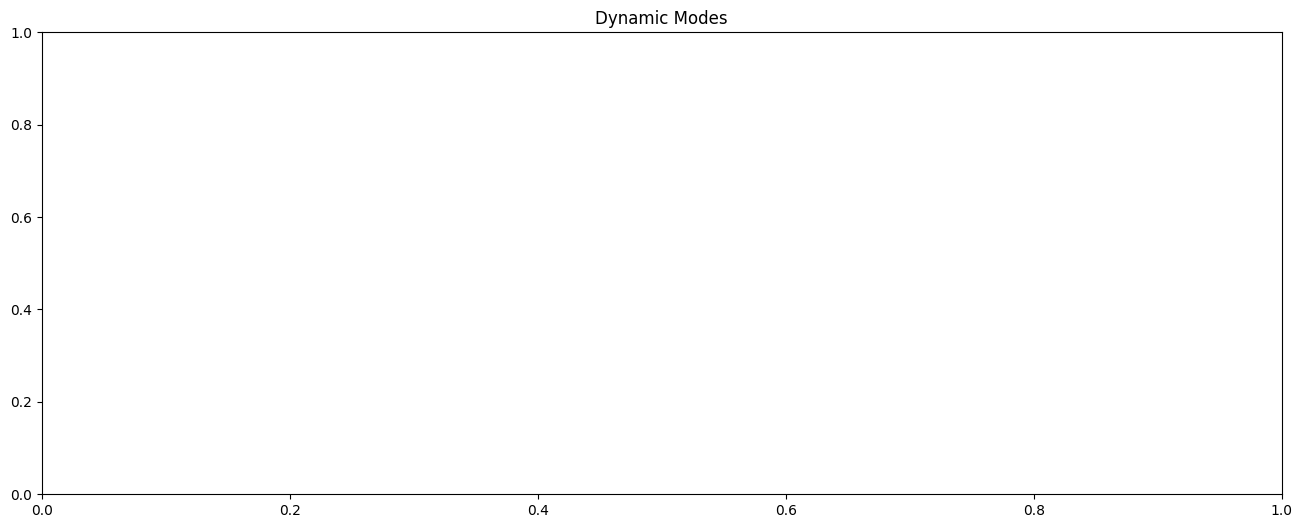

In [ ]:

# Example usage
if __name__ == "__main__":
    # # Generate sample data
    # x = np.linspace(0, 10, 256)
    # t = np.linspace(0, 8*np.pi, 400)
    # X, T = np.meshgrid(x, t)
    # f = np.sin(X) * np.exp(0.1*T) + 0.5*np.cos(2*X) * np.sin(3*T)
    
    # # Add noise for realism
    # f += 0.1 * (np.random.randn(*f.shape) + 1j*np.random.randn(*f.shape))
    
    # Run DMD comparison
    f_custom, f_pydmd = dynamic_mode_decomposition(x, t, f1, r=20)
# dynamic_mode_decomposition(xi, t, f2, r=20)

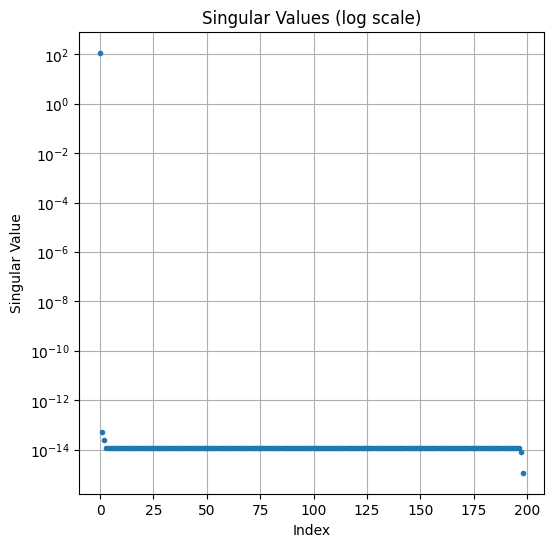

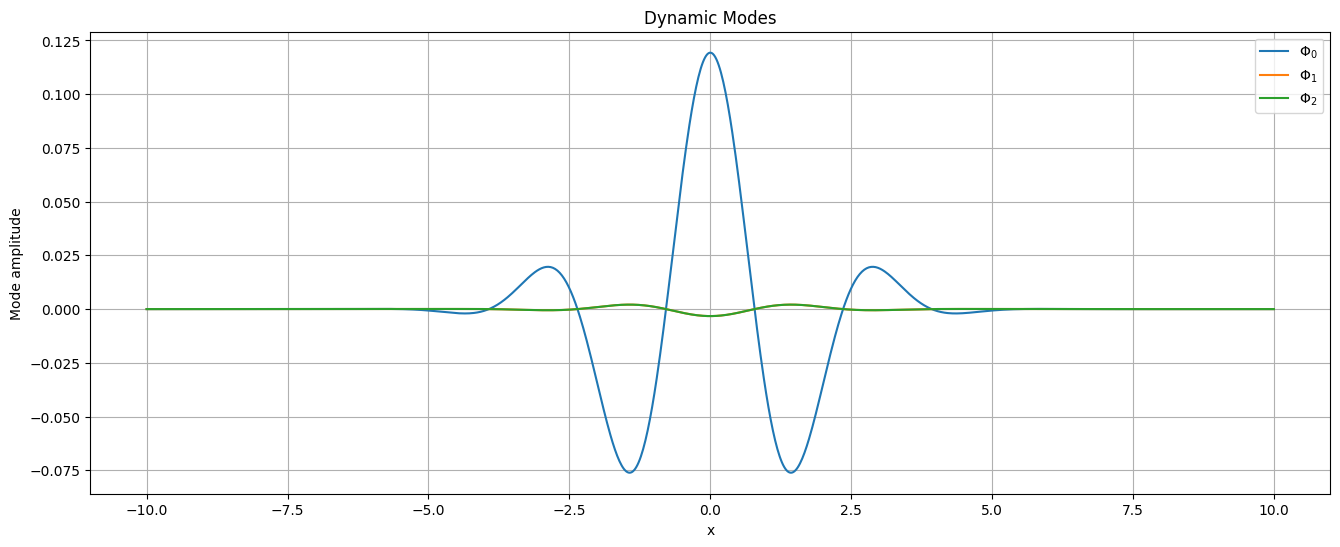

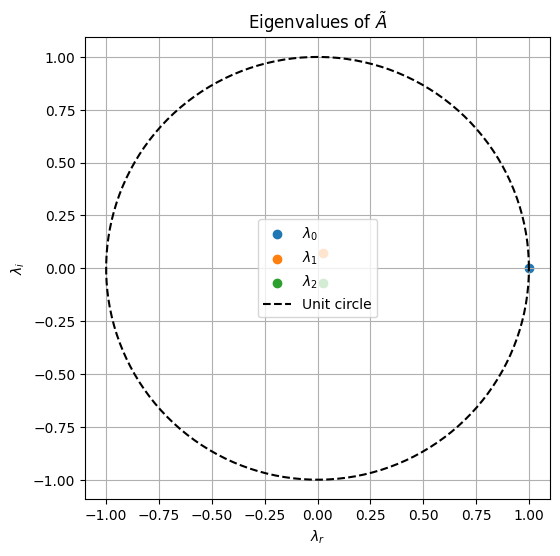

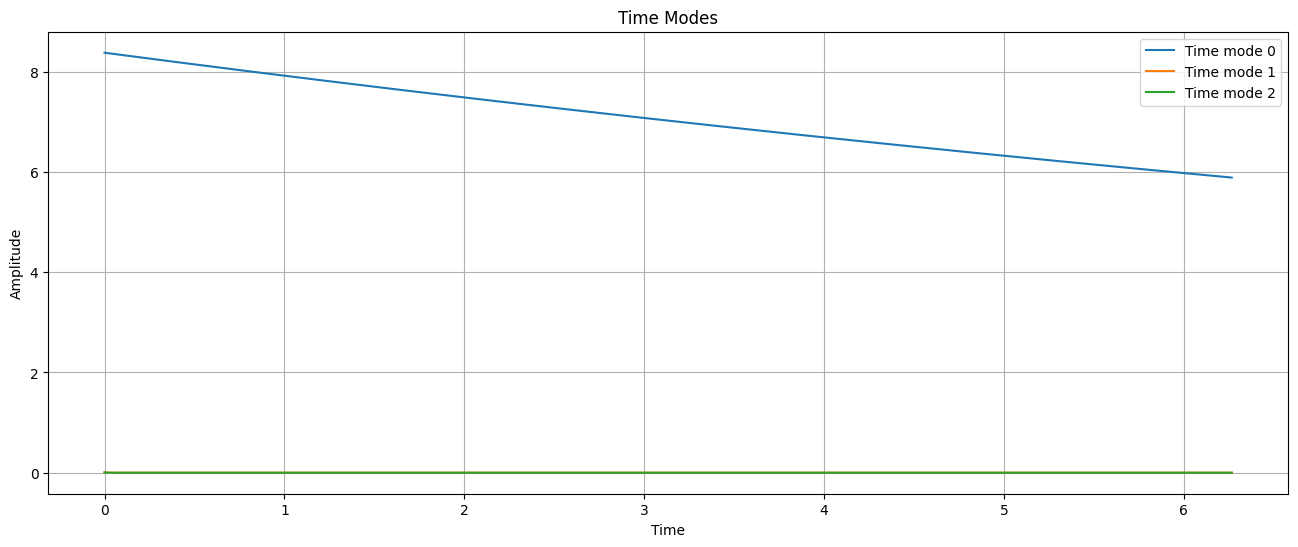

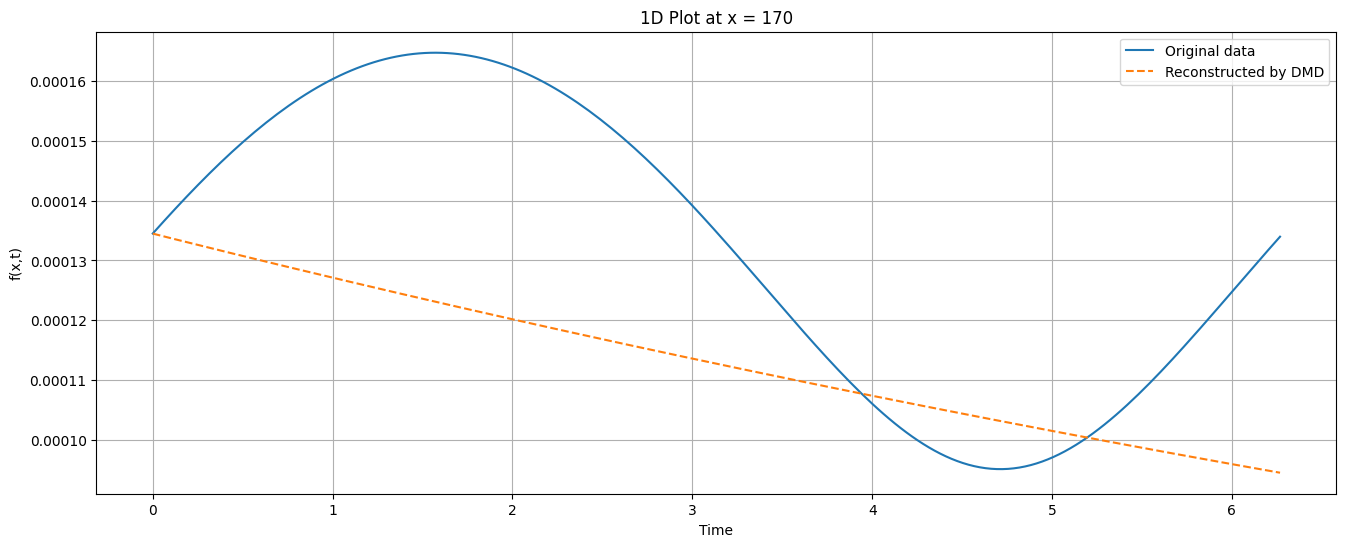

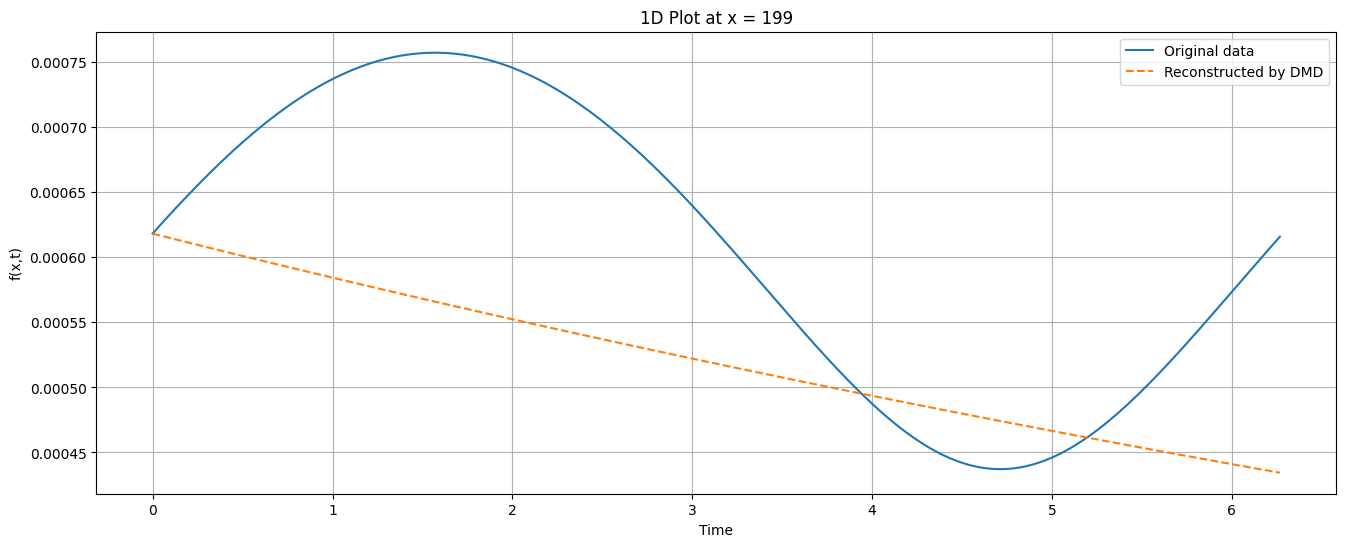

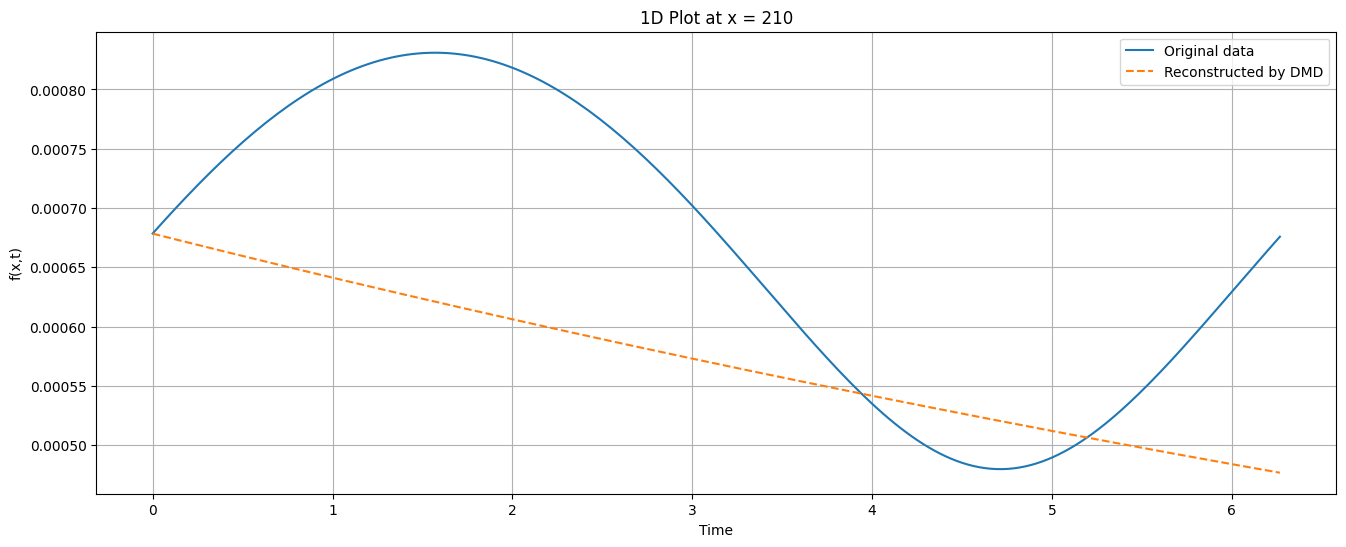

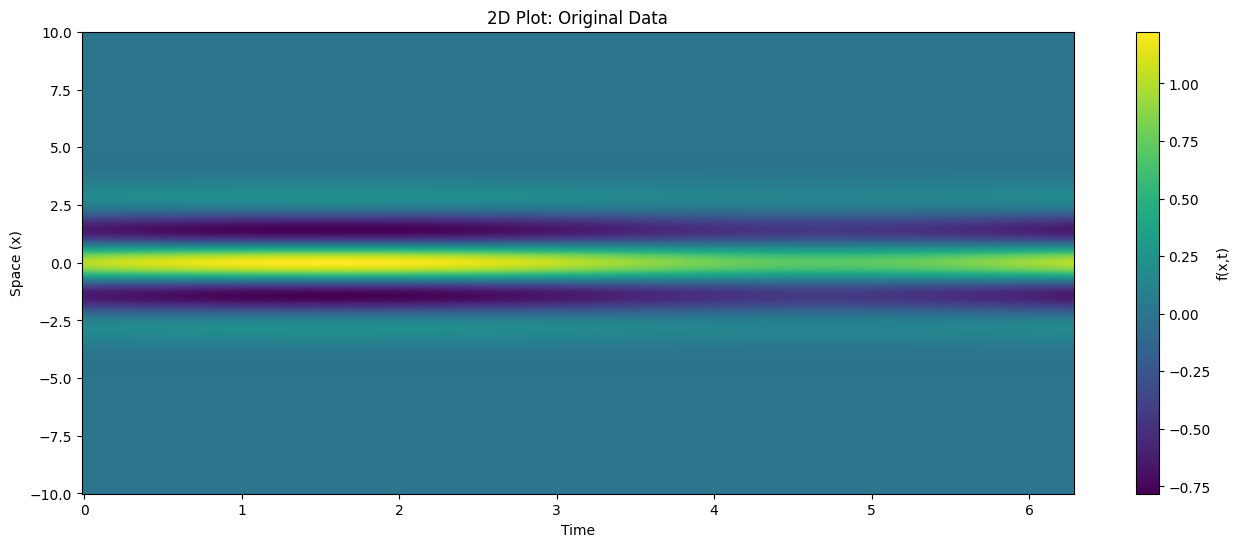

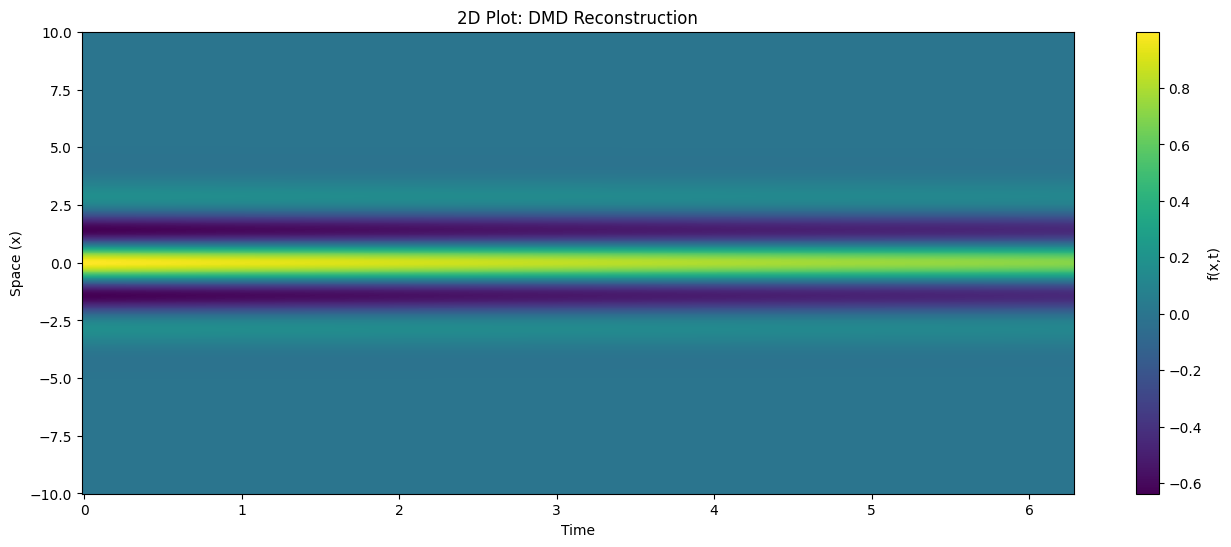

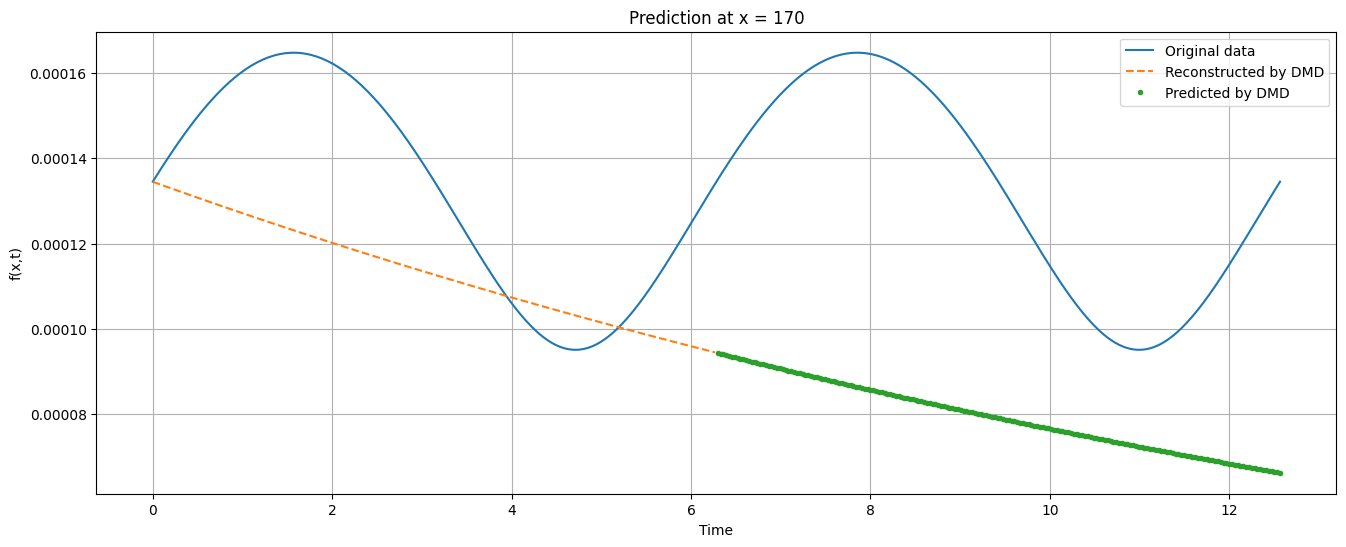

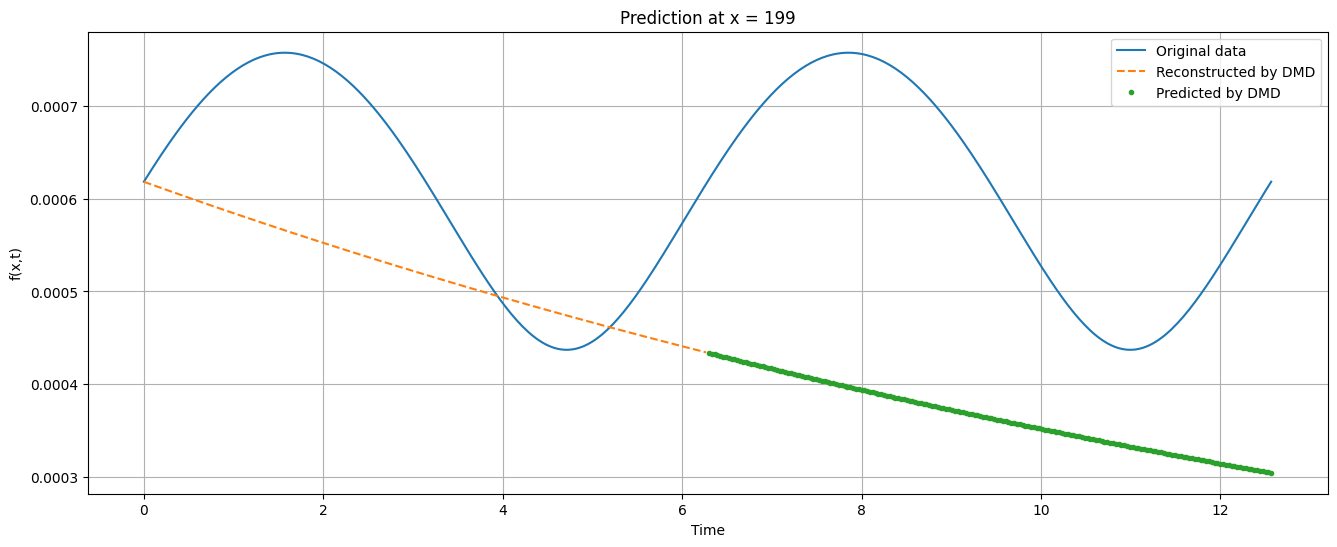

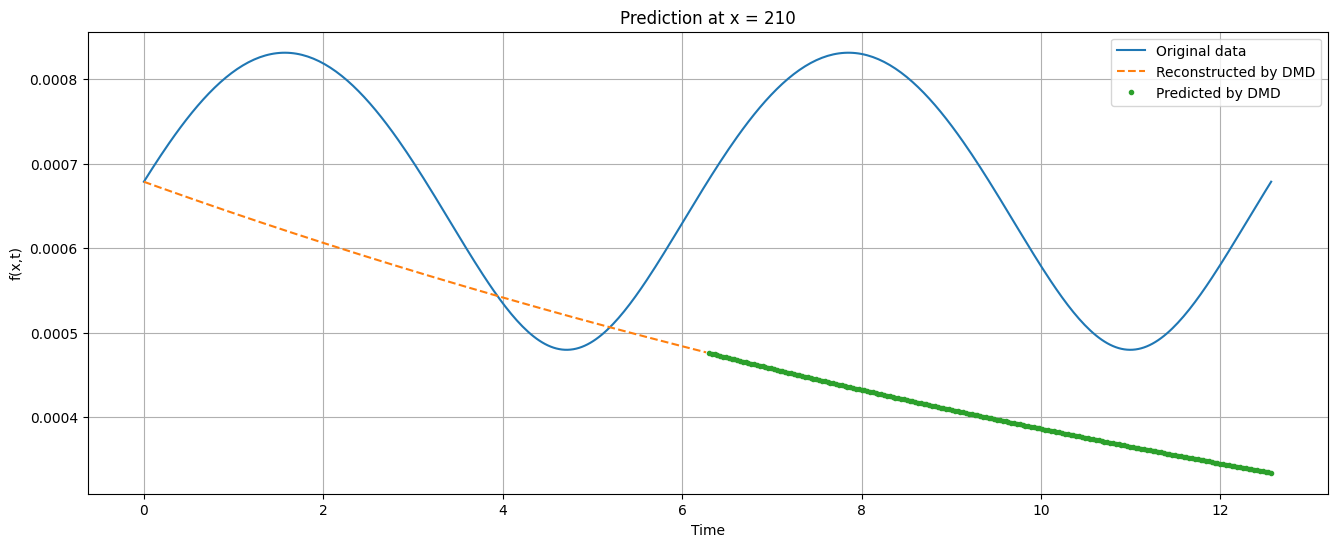

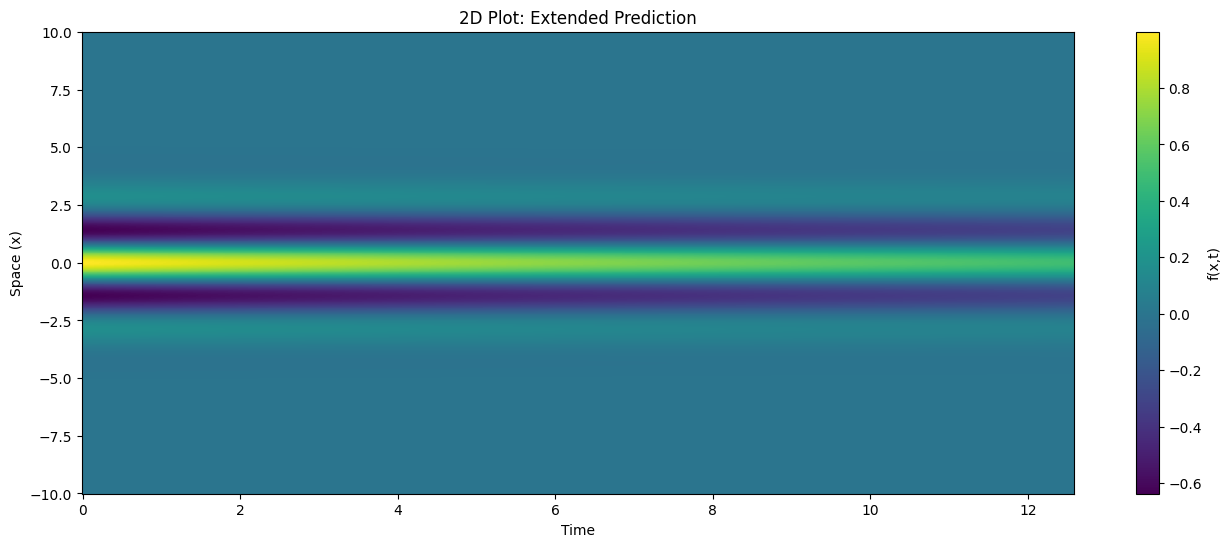

In [ ]:
dynamic_mode_decomposition(xi, t, f3, r=20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

def plot_original_vs_reconstructed_1d(t_train, xi, f_train, f_dmd, indices):
    for idx in indices:
        plt.figure(figsize=(16, 6))
        plt.title(f"1D Plot at x = {idx}")
        # print(f"""
        # Shape of t_train: {t_train.shape}
        # Shape of f_train[:, idx]: {f_train[:, idx].shape}
        # Shape of f_dmd[idx, :]: {f_dmd[:, idx].shape}
        # """)
        plt.plot(t_train.reshape(-1,1), np.real(f_train[:, idx].reshape(-1,1)), label='Original data')
        plt.plot(t_train.reshape(-1,1), np.real(f_dmd[:, idx].reshape(-1,1)), '--', label='Reconstructed by DMD')
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("f(x,t)")
        plt.grid(True)
        plt.show()
def plot_2d_comparison(t_train, xi, f_train, f_dmd):
    plt.figure(figsize=(16, 6))
    plt.title('2D Plot: Original Data')
    plt.pcolormesh(t_train, xi, np.real(f_train.T), shading='auto')
    plt.colorbar(label='f(x,t)')
    plt.xlabel("Time")
    plt.ylabel("Space (x)")
    plt.show()

    plt.figure(figsize=(16, 6))
    plt.title('2D Plot: DMD Reconstruction')
    plt.pcolormesh(t_train, xi, np.real(f_dmd.T), shading='auto')
    plt.colorbar(label='f(x,t)')
    plt.xlabel("Time")
    plt.ylabel("Space (x)")
    plt.show()
    
def plot_prediction(t, t_train, xi, f, f_dmd_ext, N_train, indices):
    for idx in indices:
        plt.figure(figsize=(16, 6))
        plt.title(f"Prediction at x = {idx}")
        plt.plot(t, np.real(f[:, idx]), label='Original data')
        plt.plot(t_train, np.real(f_dmd_ext[ :N_train,idx]), '--', label='Reconstructed by DMD')
        plt.plot(t[N_train:], np.real(f_dmd_ext[ N_train:,idx]), '.', label='Predicted by DMD')
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("f(x,t)")
        plt.grid(True)
        plt.show()

def plot_2d_prediction(t_ext, xi, f_dmd_ext):
    plt.figure(figsize=(16, 6))
    plt.title('2D Plot: Extended Prediction')
    plt.pcolormesh(t_ext, xi, np.real(f_dmd_ext.T), shading='auto')
    plt.colorbar(label='f(x,t)')
    plt.xlabel("Time")
    plt.ylabel("Space (x)")
    plt.show()
    
def hodmd(xi, t, f, d=3, r=20, show_plots=True):
    """
    Perform Higher Order Dynamic Mode Decomposition (HODMD).

    Parameters:
        xi (np.ndarray): Spatial grid points.
        t (np.ndarray): Time points.
        f (np.ndarray): Spatio-temporal data matrix of shape (len(t), len(xi)).
        d (int): Delay embedding dimension.
        r (int): Rank for SVD truncation.
        show_plots (bool): Whether to display plots.
    """
    dt = t[1] - t[0]
    N_train = f.shape[0] // 2
    f_train = f[:N_train]
    t_train = t[:N_train]
    # Step 1: Construct delay-embedded data matrix
    X_delayed = []
    for i in range(N_train - d + 1):
        X_delayed.append(f_train[i:i + d].flatten())
    X_delayed = np.array(X_delayed).T  # Shape: (d * nx, N-d+1)

    X1 = X_delayed[:, :-1]
    X2 = X_delayed[:, 1:]

    # Step 2: SVD
    U, Sdiag, Vh = linalg.svd(X1, full_matrices=False)
    S = np.diag(Sdiag)
    V = np.conj(Vh).T

    Ur = U[:, :r]
    Sr = S[:r, :r]
    Vr = V[:, :r]
    
    if show_plots:
        plot_singular_values(Sdiag)

    # Step 3: Compute Atilde
    Atilde = Ur.conj().T @ X2 @ Vr @ linalg.inv(Sr)
    Lambda_diag, W = linalg.eig(Atilde)
    Phi_tilde = X2 @ Vr @ linalg.inv(Sr) @ W

    # Map back to physical space
    Phi = Phi_tilde.reshape(d, -1, Phi_tilde.shape[1])  # shape: (d, nx, r)
    Phi_phys = np.mean(Phi, axis=0)  # average over delays

    omega = np.log(Lambda_diag) / dt

    if show_plots:
        plot_dynamic_modes(xi, Phi_phys)
        plot_eigenvalues(Lambda_diag)

    # Step 4: Reconstruct signal
    b = linalg.pinv(Phi_phys) @ f_train[0]
    t_dyn = np.zeros((r, len(t_train)), dtype=complex)
    for i in range(len(t_train)):
        t_dyn[:, i] = b * np.exp(omega * t_train[i])

    f_dmd = Phi_phys @ t_dyn
    f_dmd = f_dmd.T  # now shape: (len(t_train), len(xi))
    if show_plots:
        plot_time_modes(t_train, t_dyn)
        plot_original_vs_reconstructed_1d(t_train, xi, f_train, f_dmd, indices=[10, 199, 210])
        plot_2d_comparison(t_train, xi, f_train, f_dmd)

    # Step 5: Predict future dynamics
    t_ext = t
    t_ext_dyn = np.zeros((r, len(t_ext)), dtype=complex)
    for i in range(len(t_ext)):
        t_ext_dyn[:, i] = b * np.exp(omega * t_ext[i])

    f_dmd_ext = Phi_phys @ t_ext_dyn
    f_dmd_ext = f_dmd_ext.T  # shape: (len(t_ext), len(xi))
    # print(f"""\nShape of f_train: {f_train.shape}
    # Shape of X1: {X1.shape}
    # Shape of X2: {X2.shape}
    # Shape of Ur: {Ur.shape}
    # Shape of Sr: {Sr.shape}
    # Shape of Vr: {Vr.shape}
    # Shape of A_tilde: {Atilde.shape}
    # Shape of omega: {omega.shape}
    # Shape of t_dyn: {t_dyn.shape}
    # Shape of t_train: {t_train.shape}
    # Shape of f_dmd: {f_dmd.shape}
    # Shape of t_ext: {t_ext.shape}
    # Shape of t_ext_dyn: {t_ext_dyn.shape}
    # Shape of f_dmd_ext: {f_dmd_ext.shape}
    # \n""")
    if show_plots:
        plot_prediction(t, t_train, xi, f, f_dmd_ext, N_train, indices=[170, 199, 210])
        plot_2d_prediction(t_ext, xi, f_dmd_ext)

    return {
        "modes": Phi_phys,
        "eigenvalues": Lambda_diag,
        "frequencies": omega.imag,
        "reconstruction": f_dmd,
        "prediction": f_dmd_ext,
        "b": b,
        "t_modes": t_dyn
    }

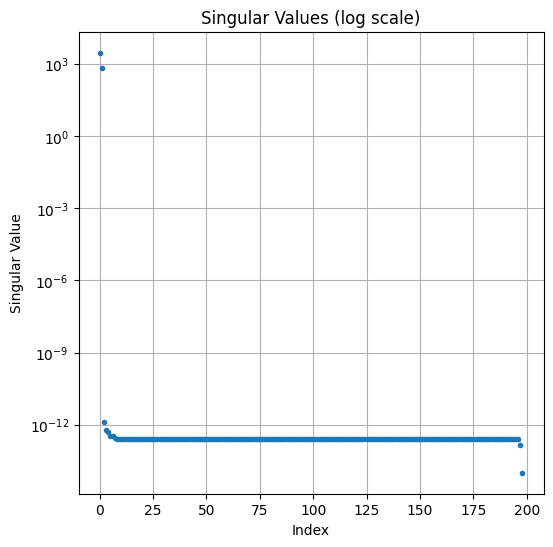

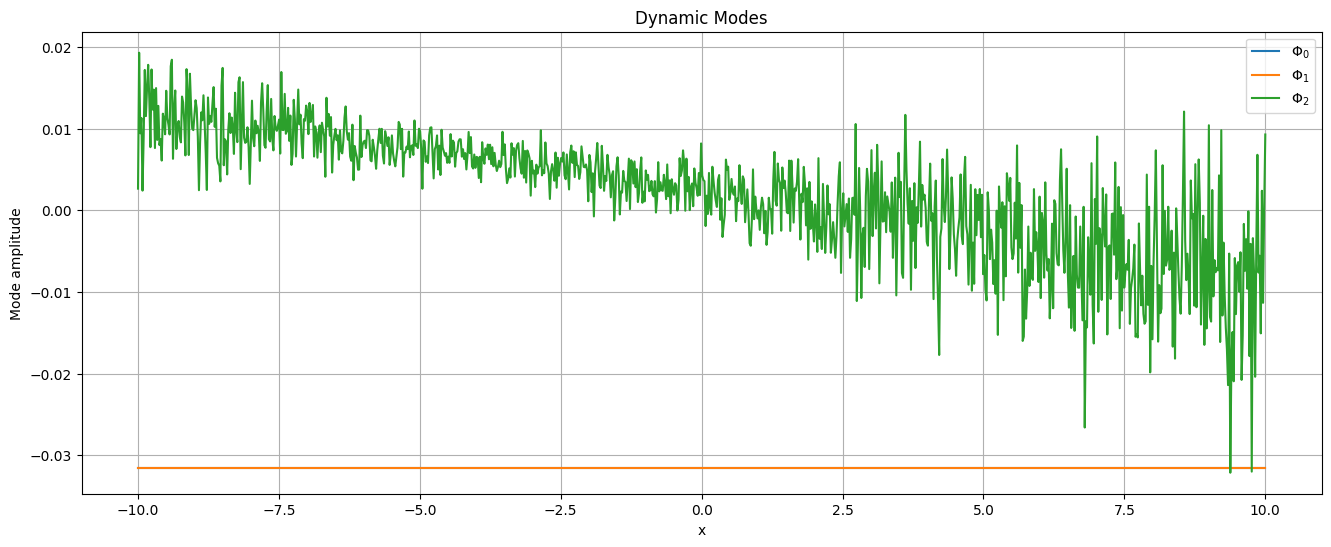

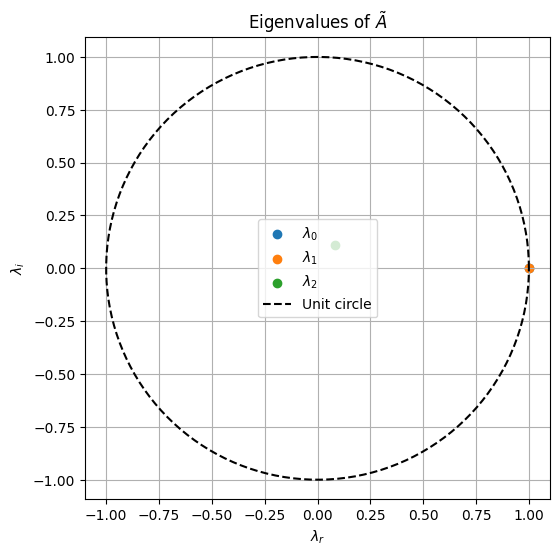

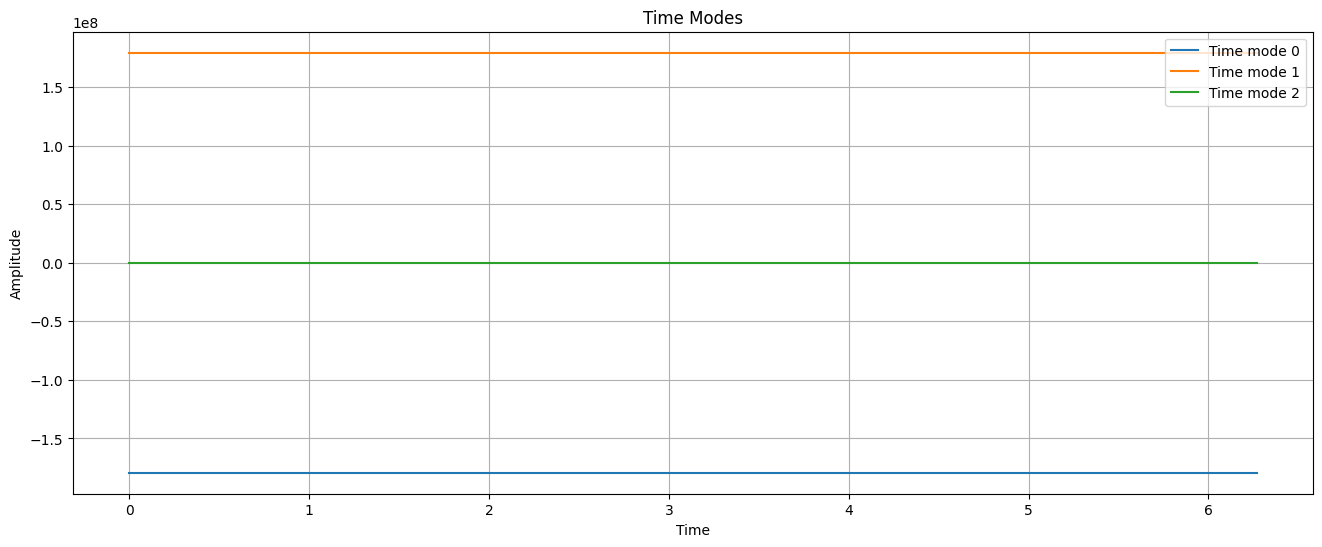

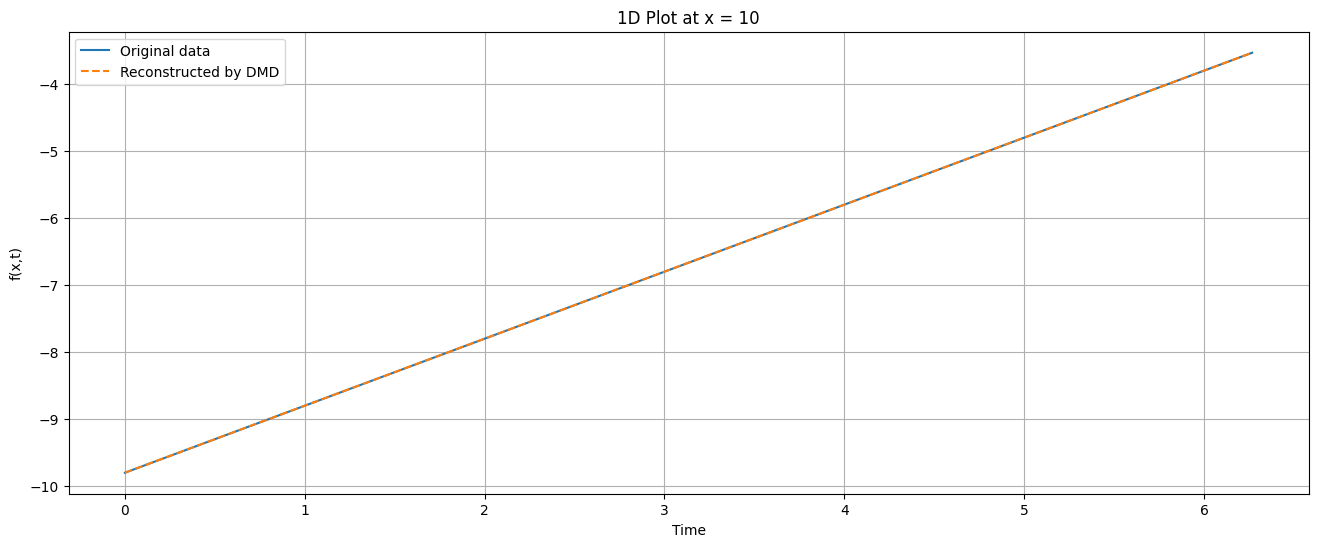

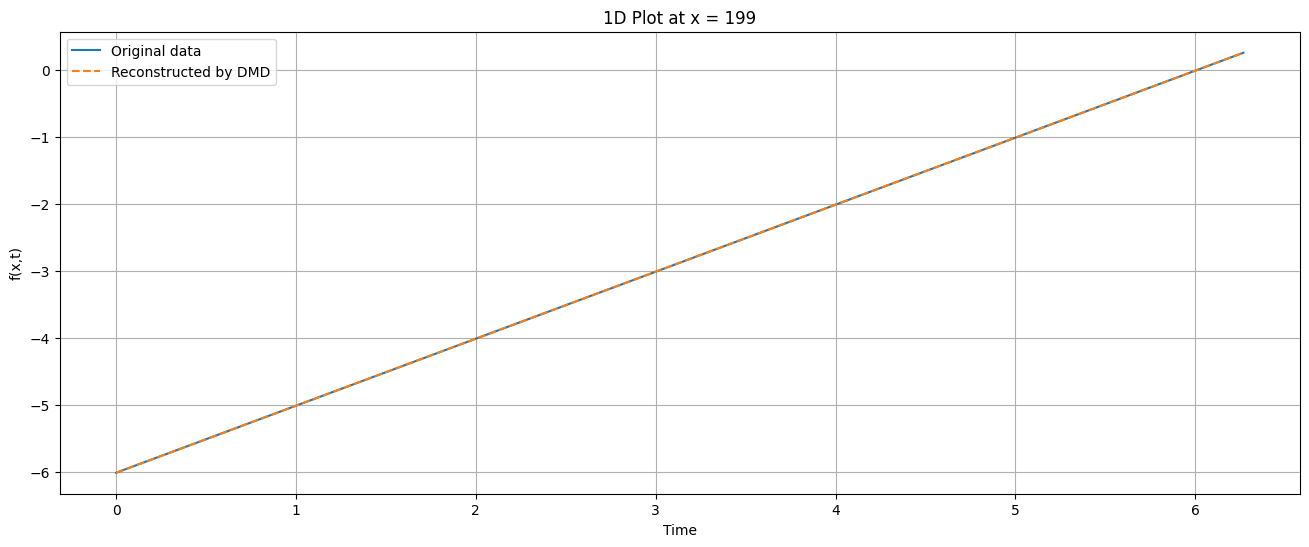

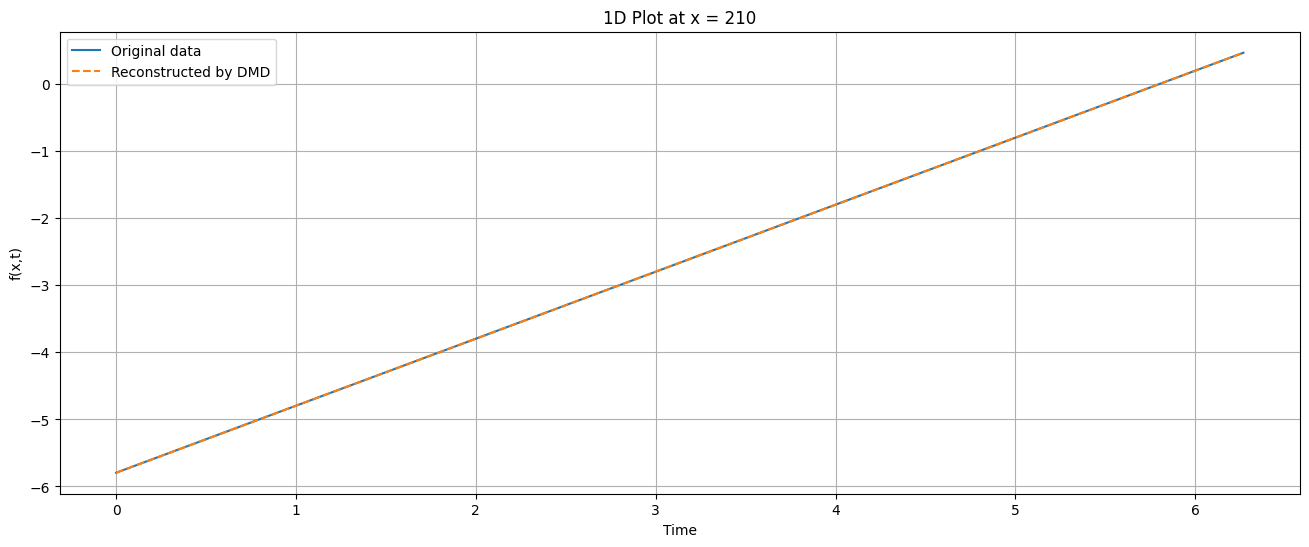

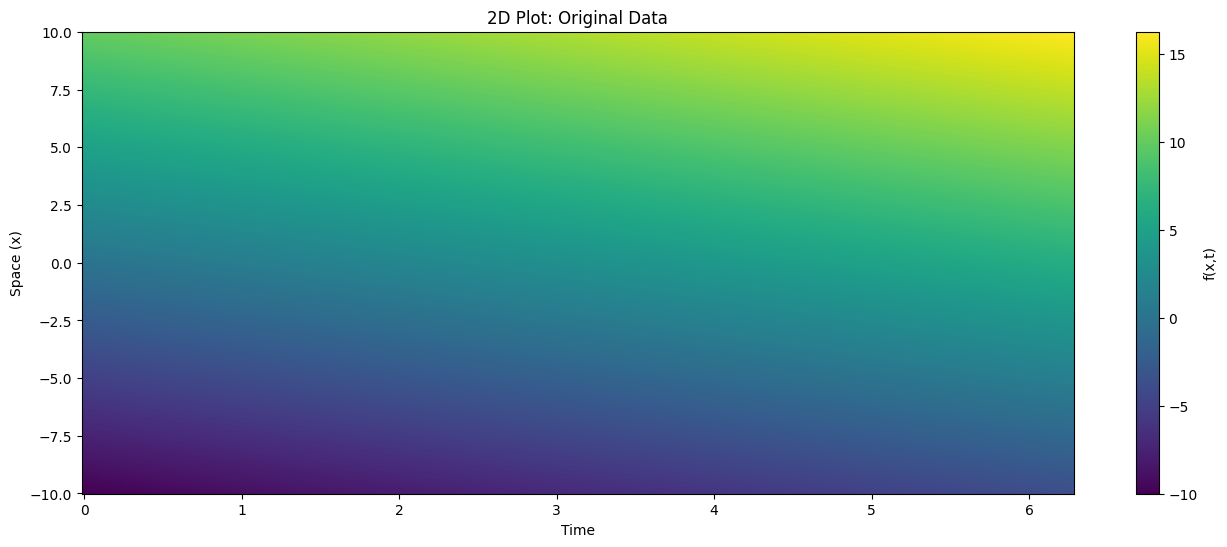

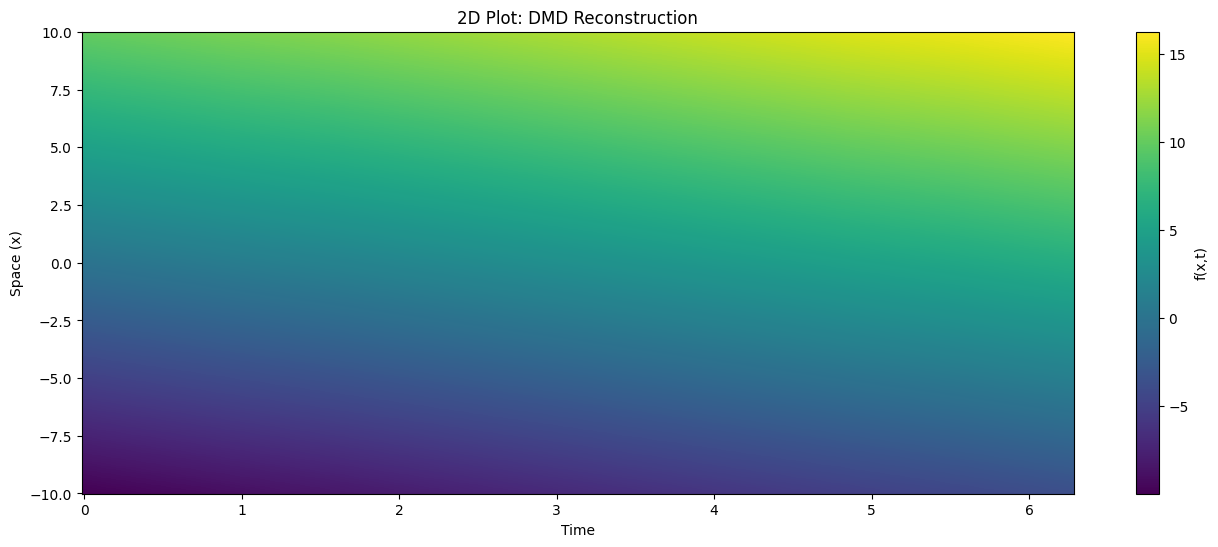

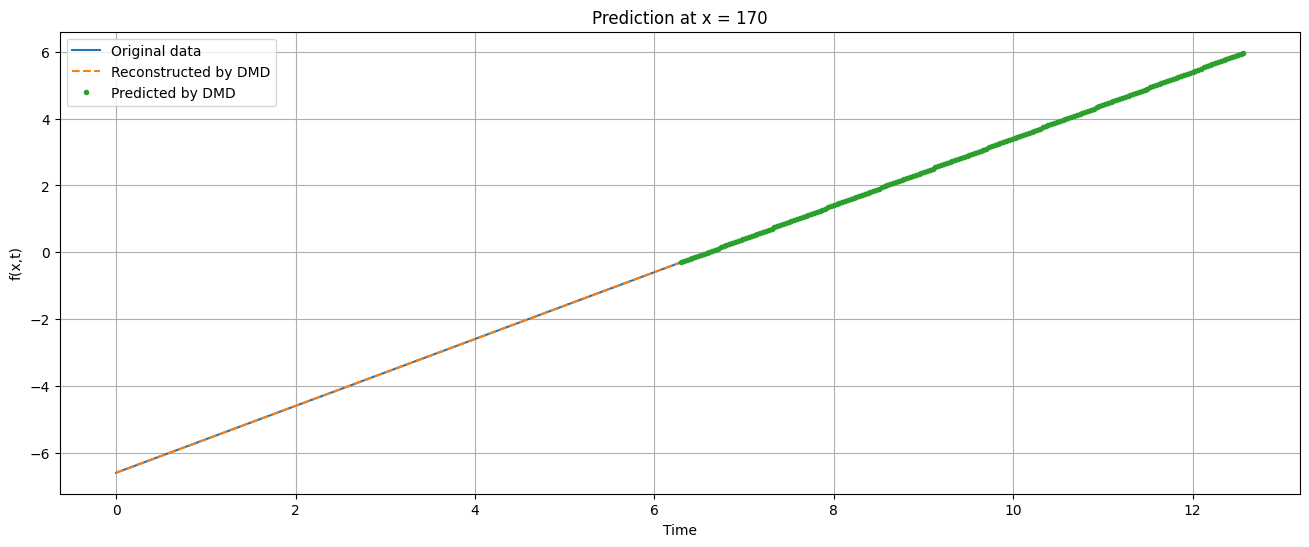

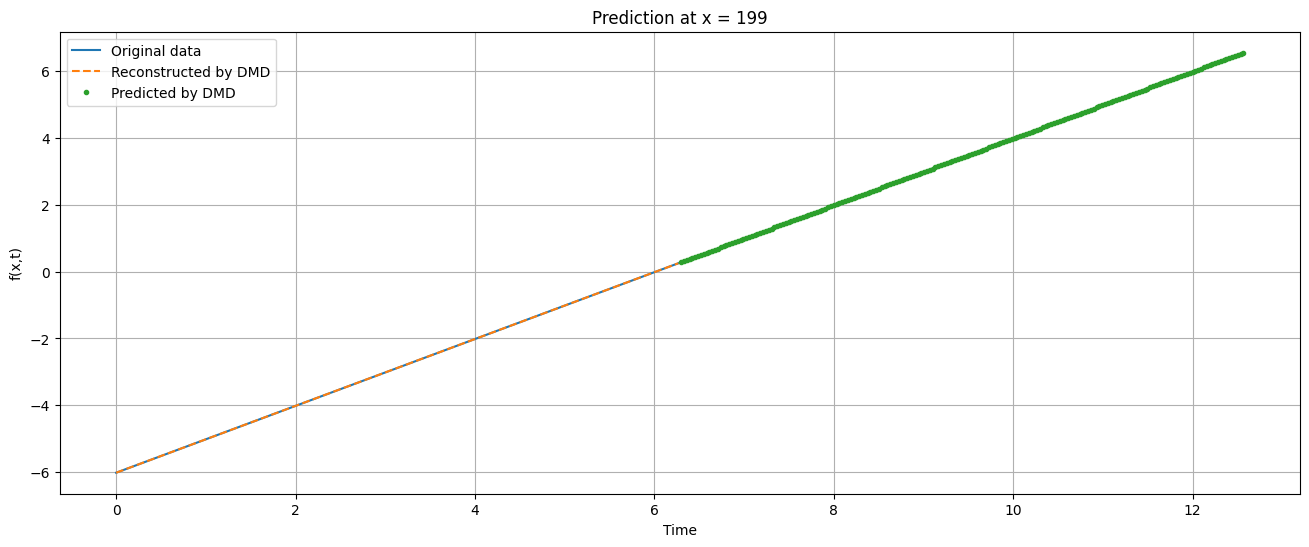

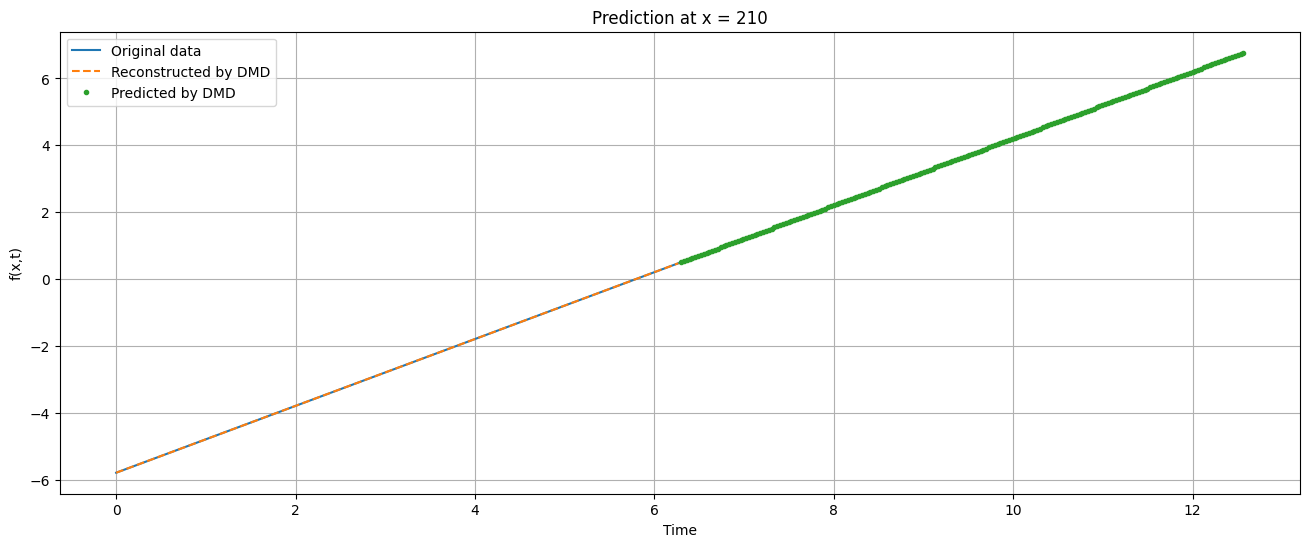

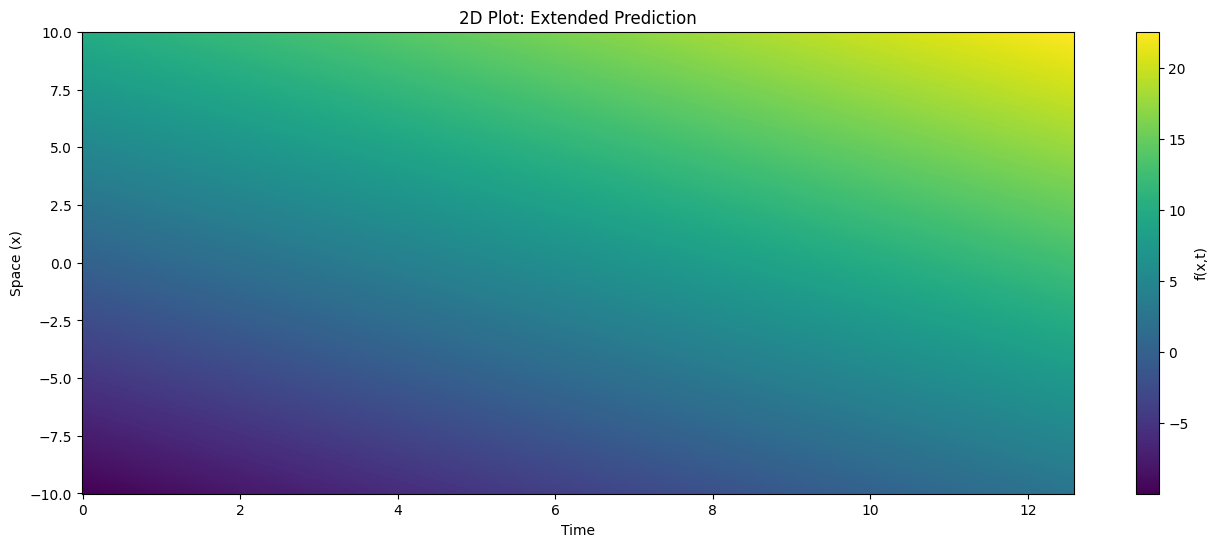

In [ ]:
results = hodmd(xi, t, f1, d=1, r=20)

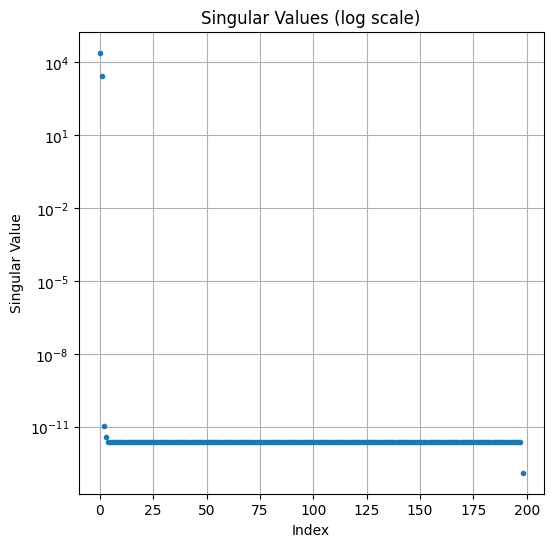

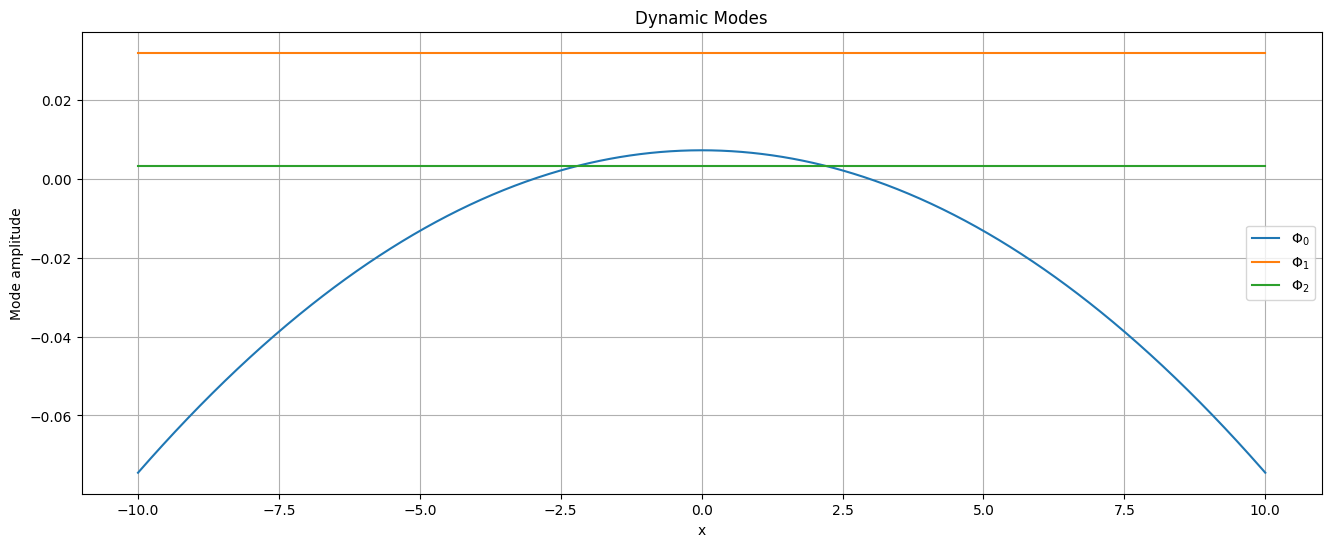

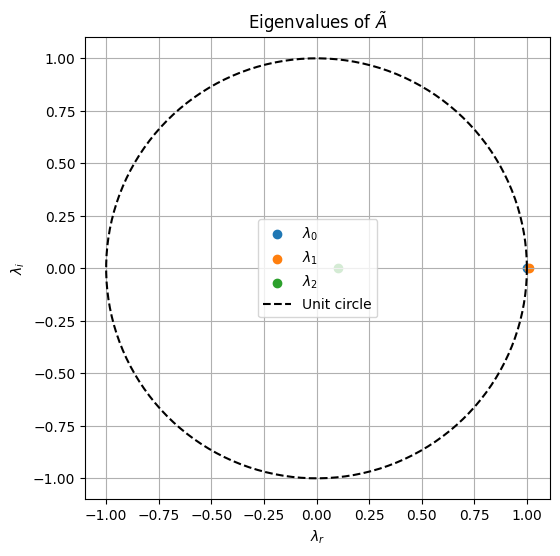

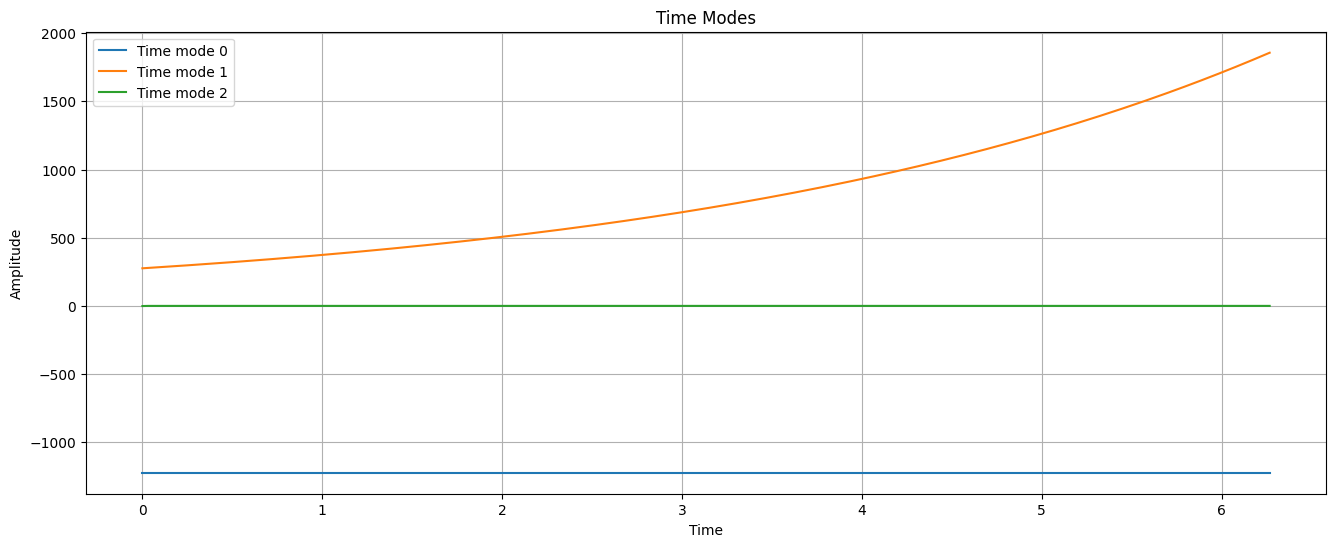

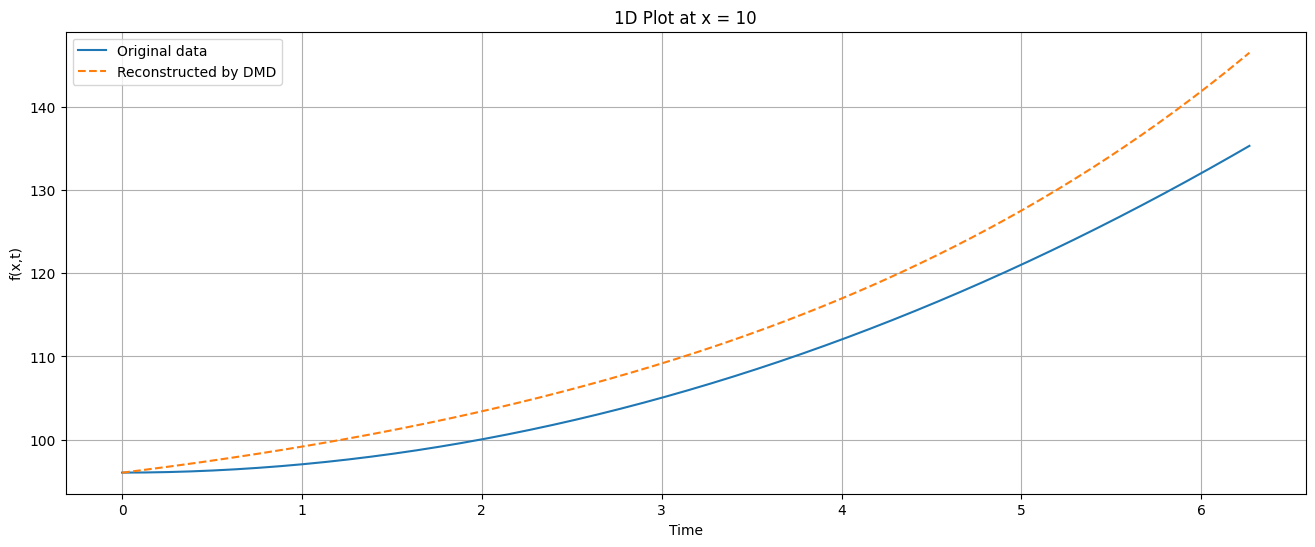

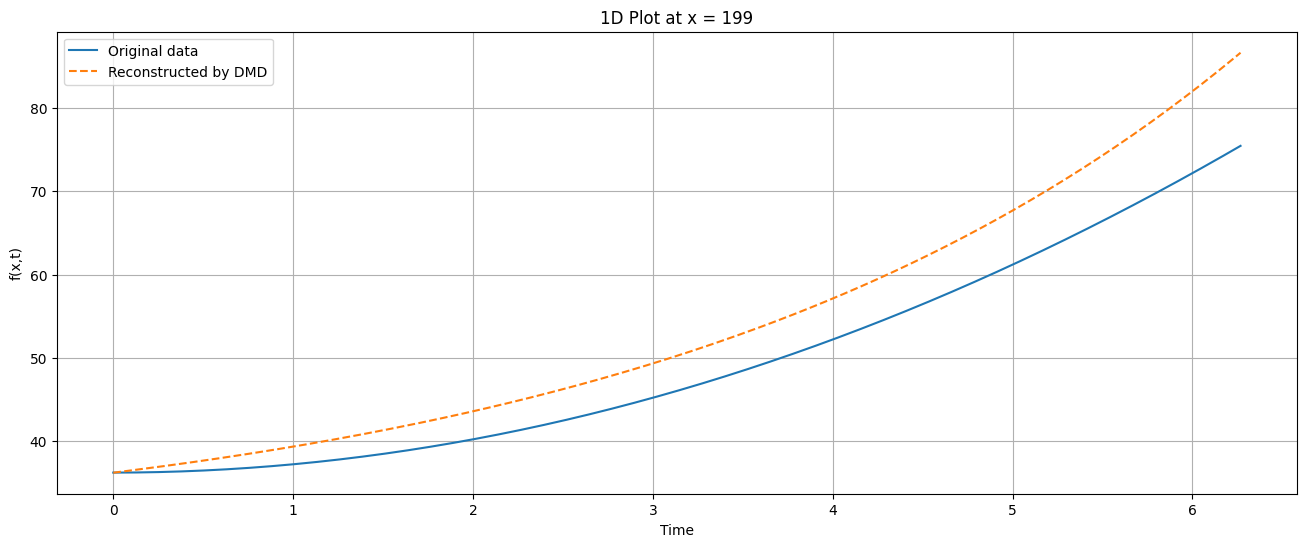

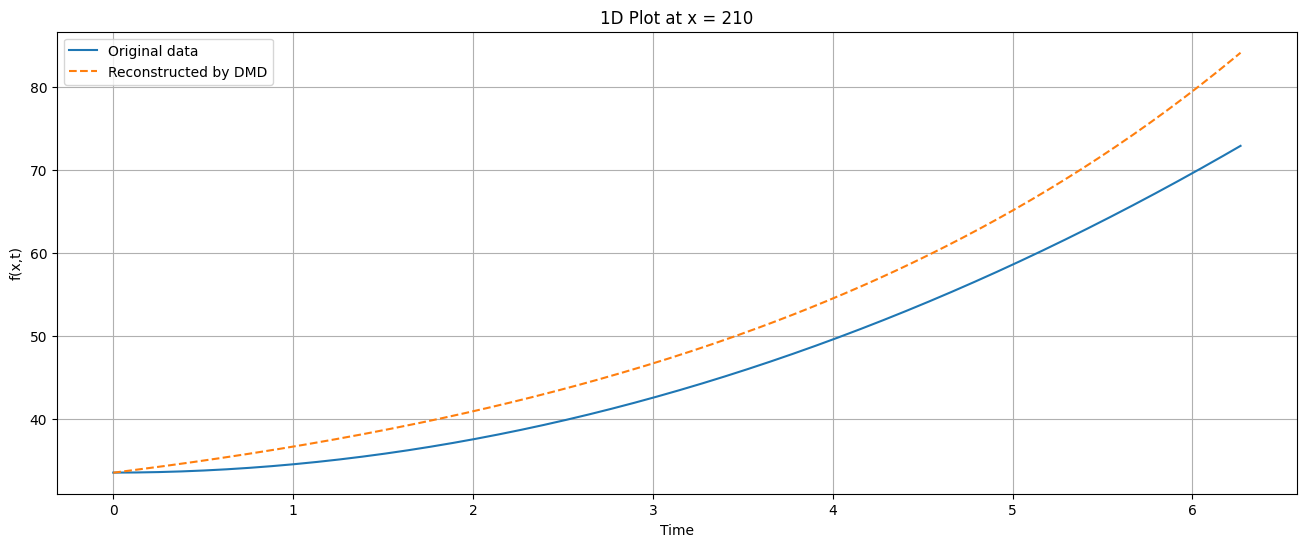

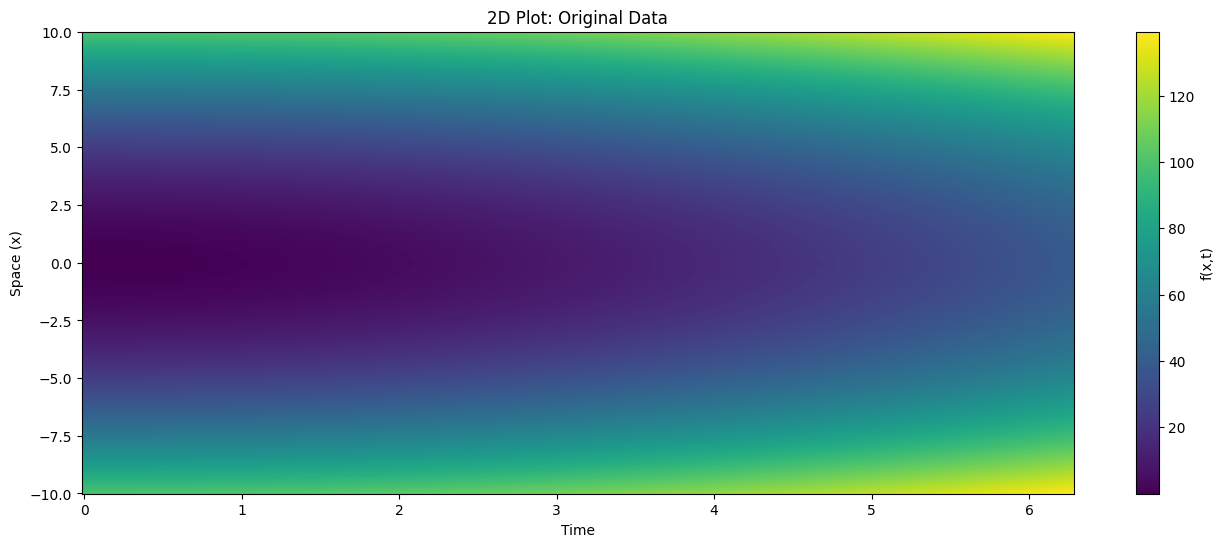

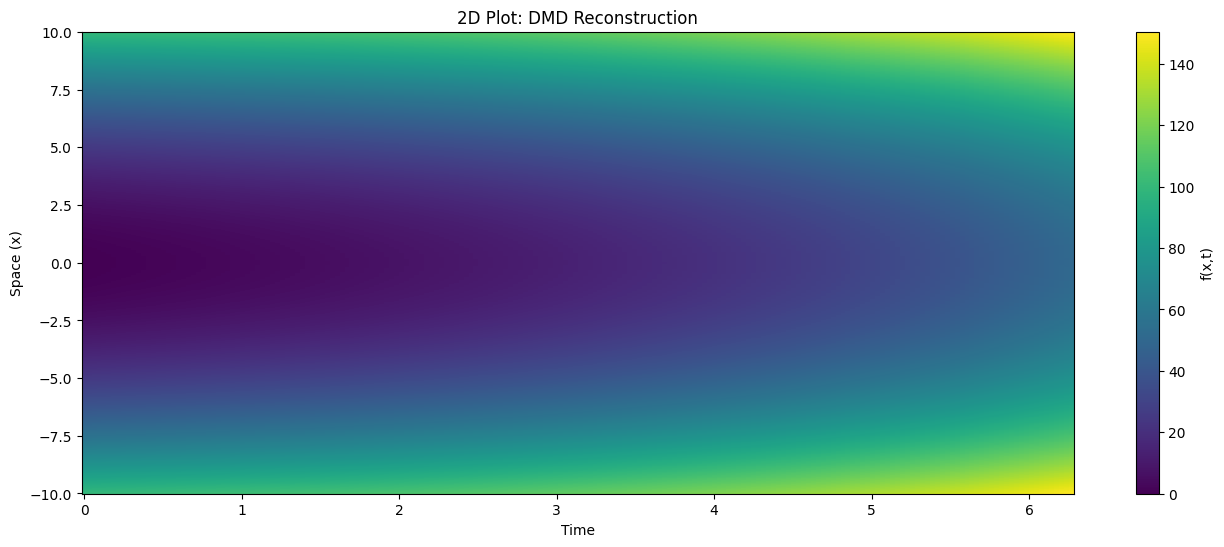

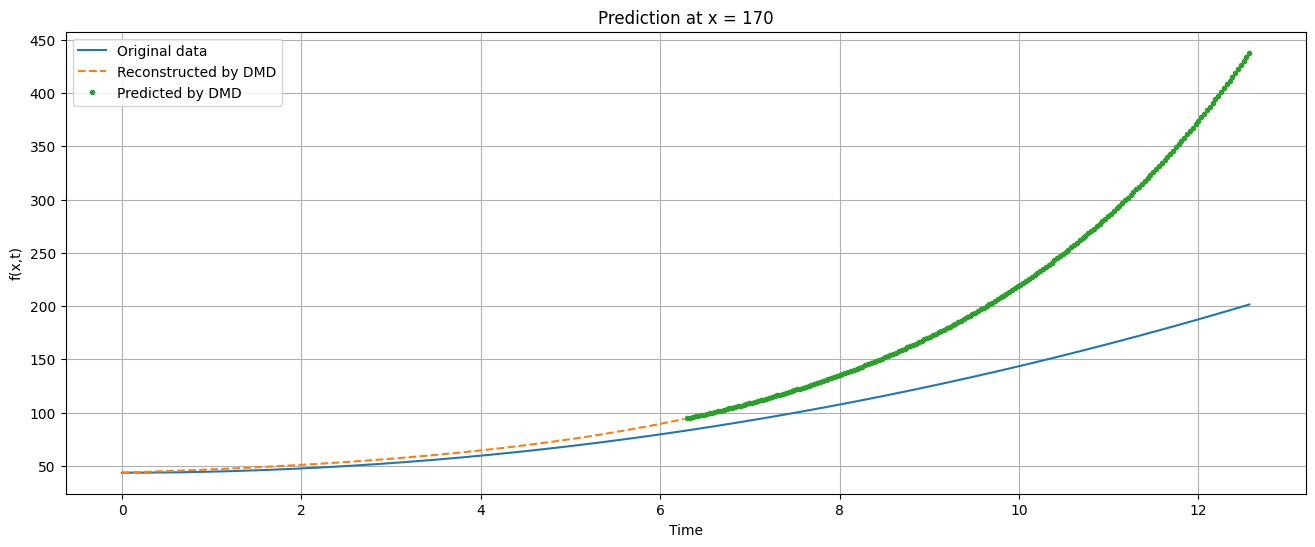

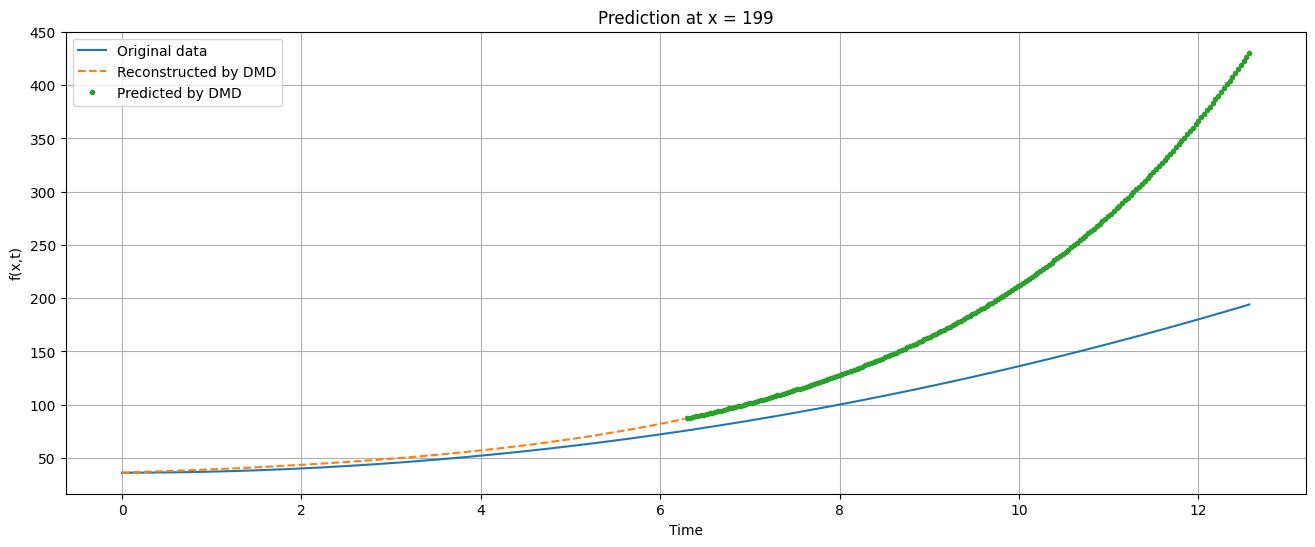

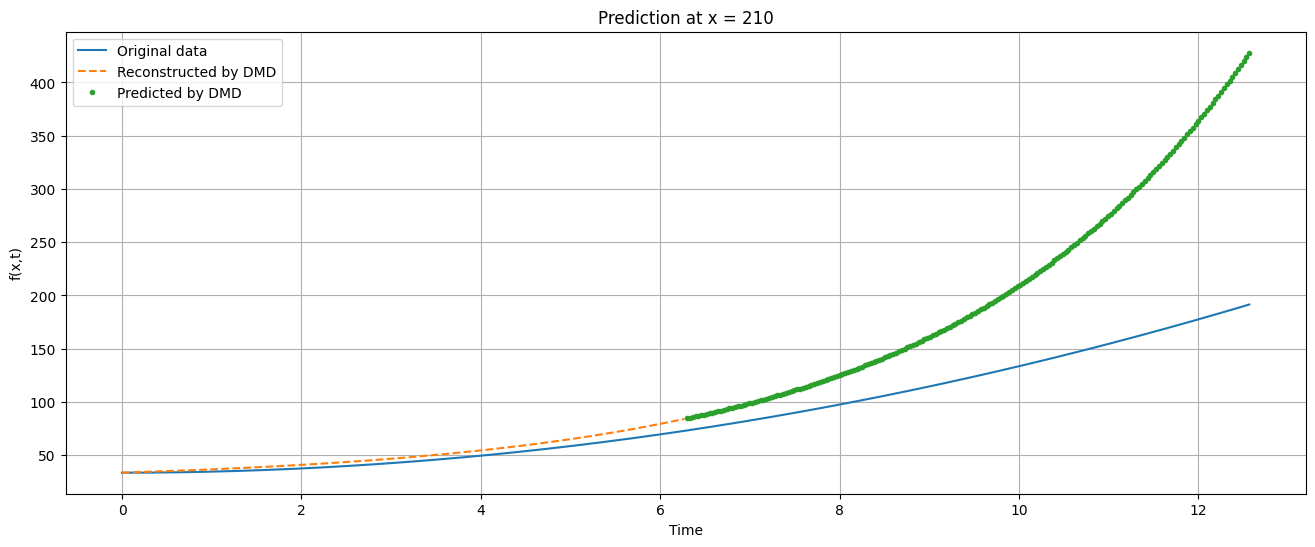

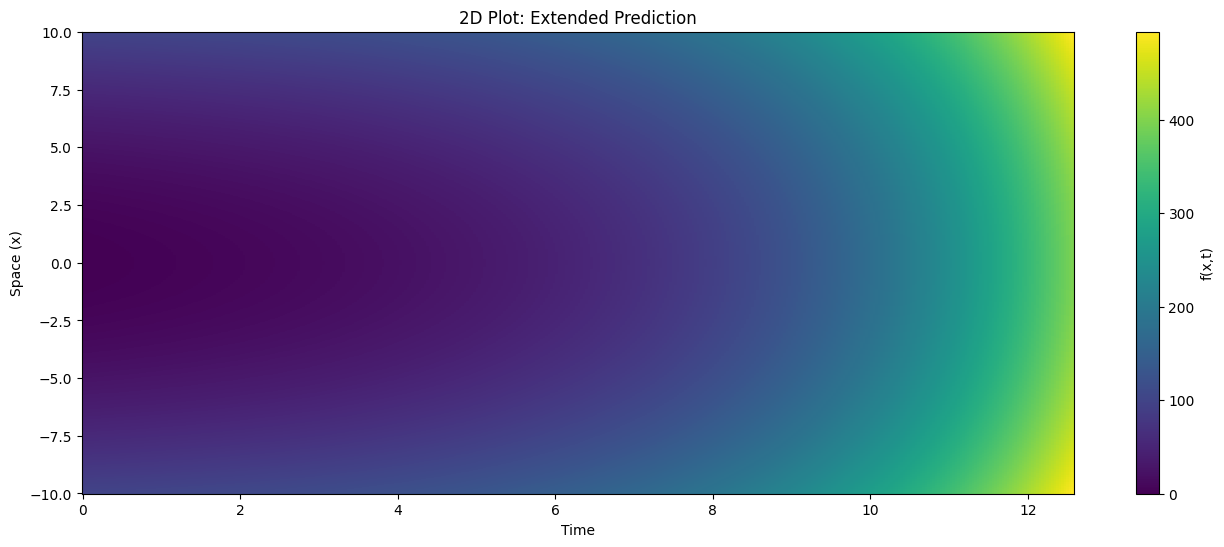

In [ ]:
results = hodmd(xi, t, f2, d=1, r=20)

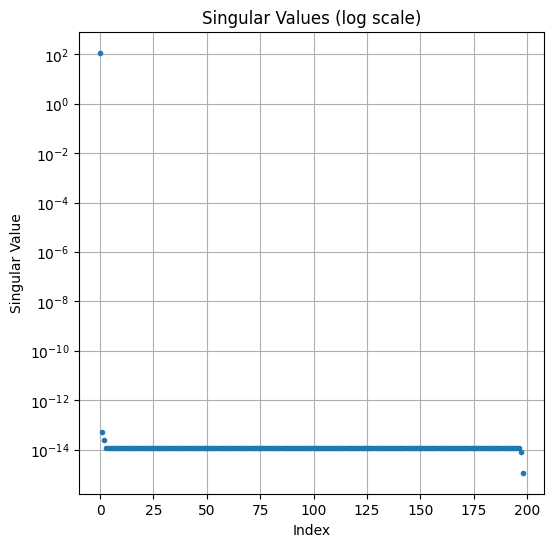

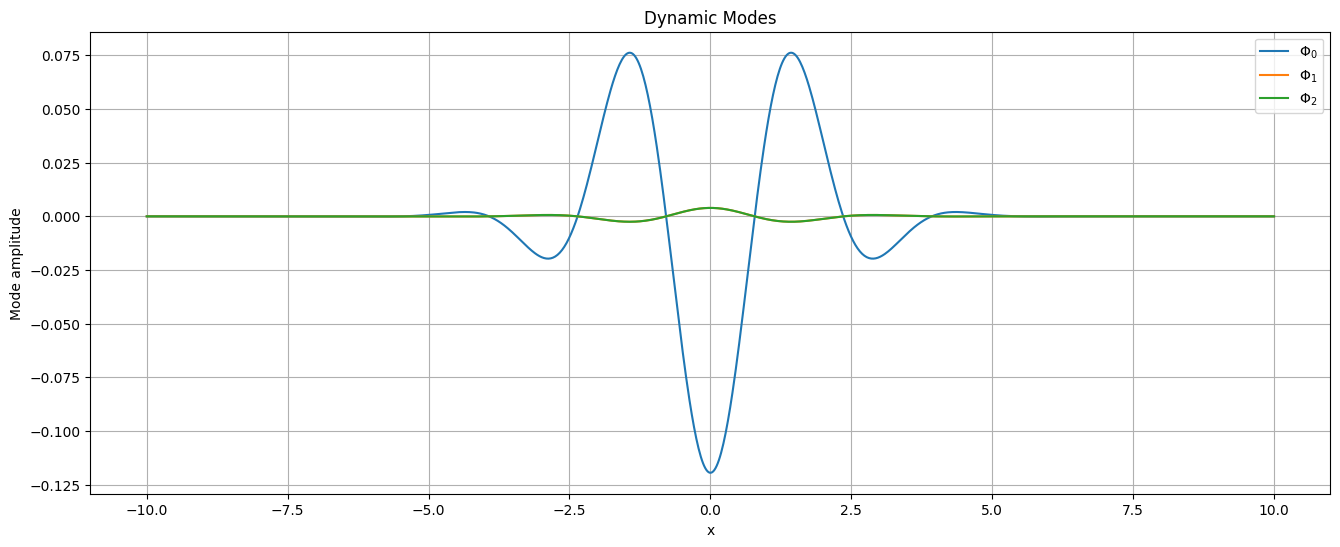

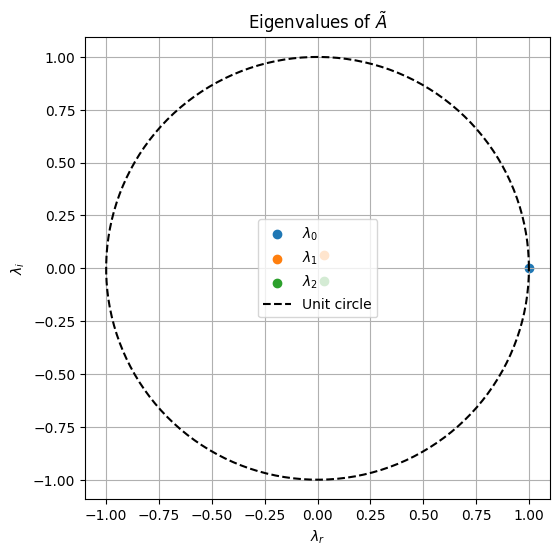

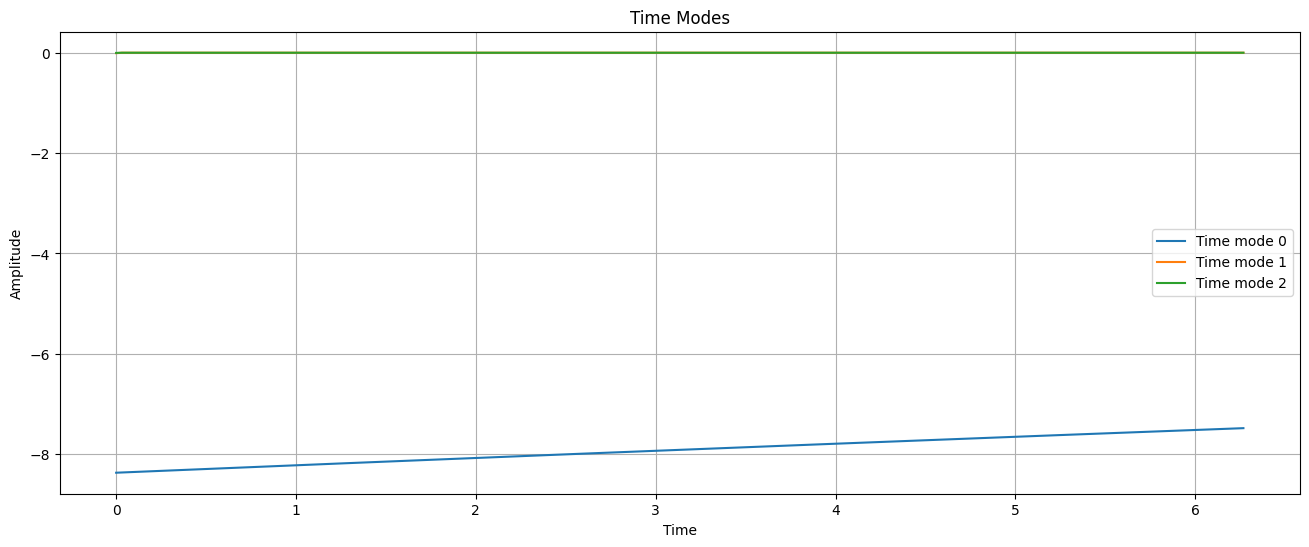

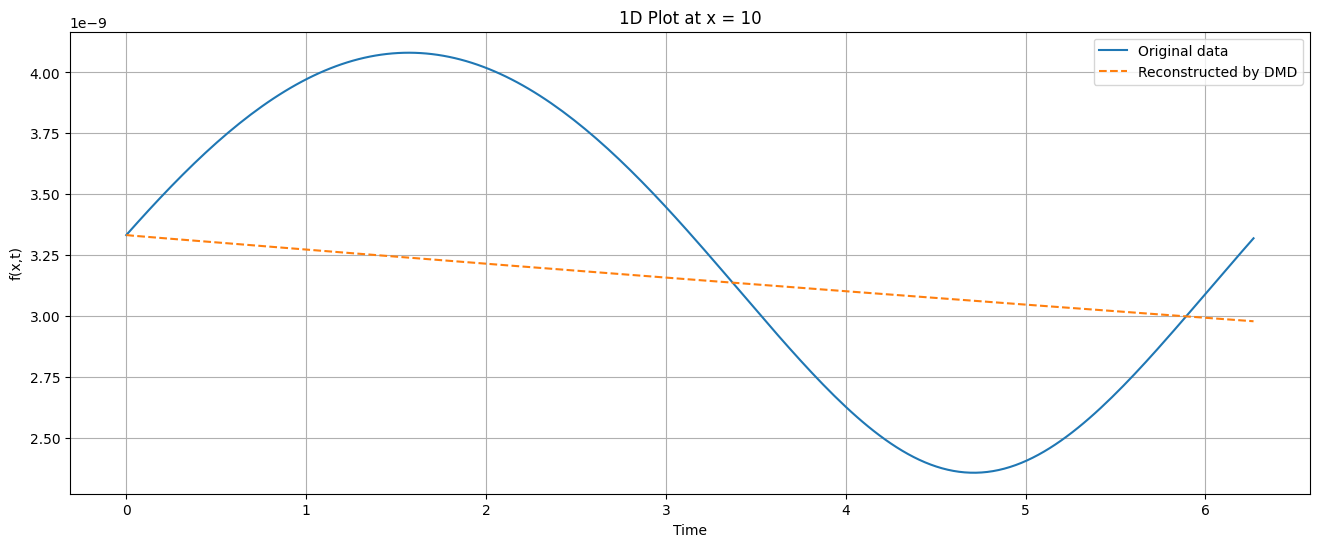

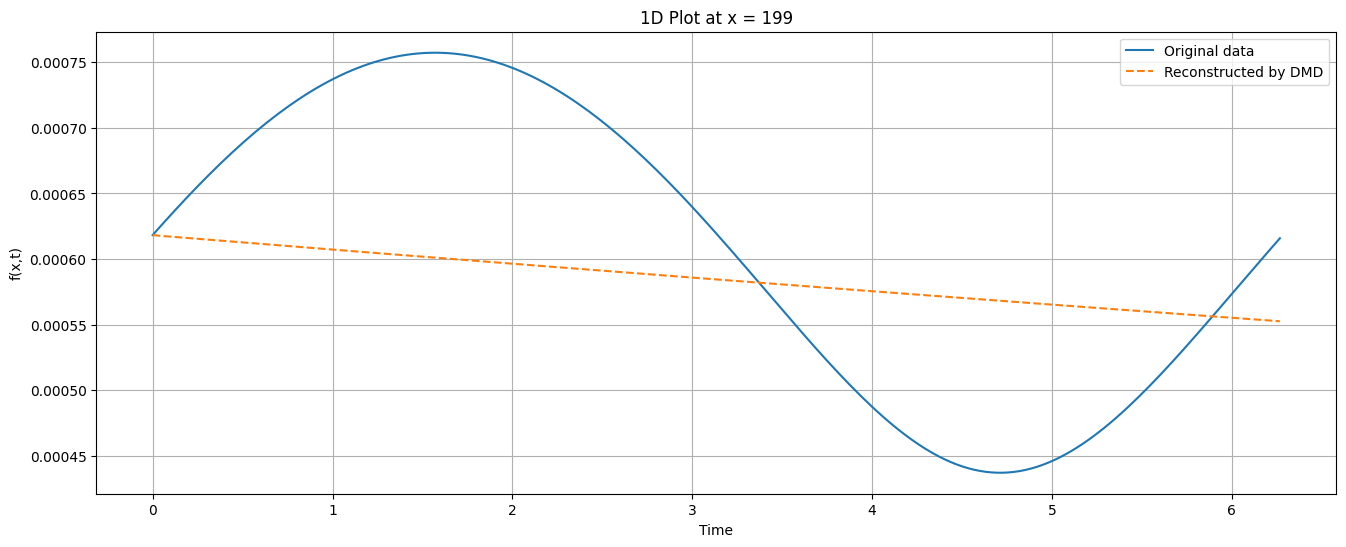

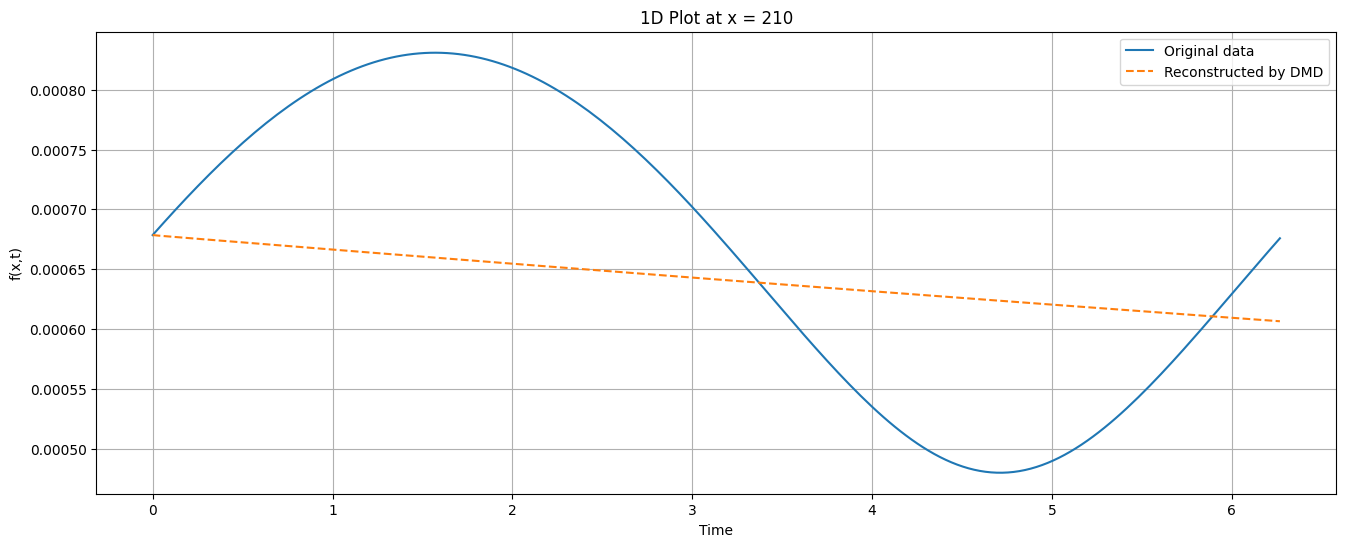

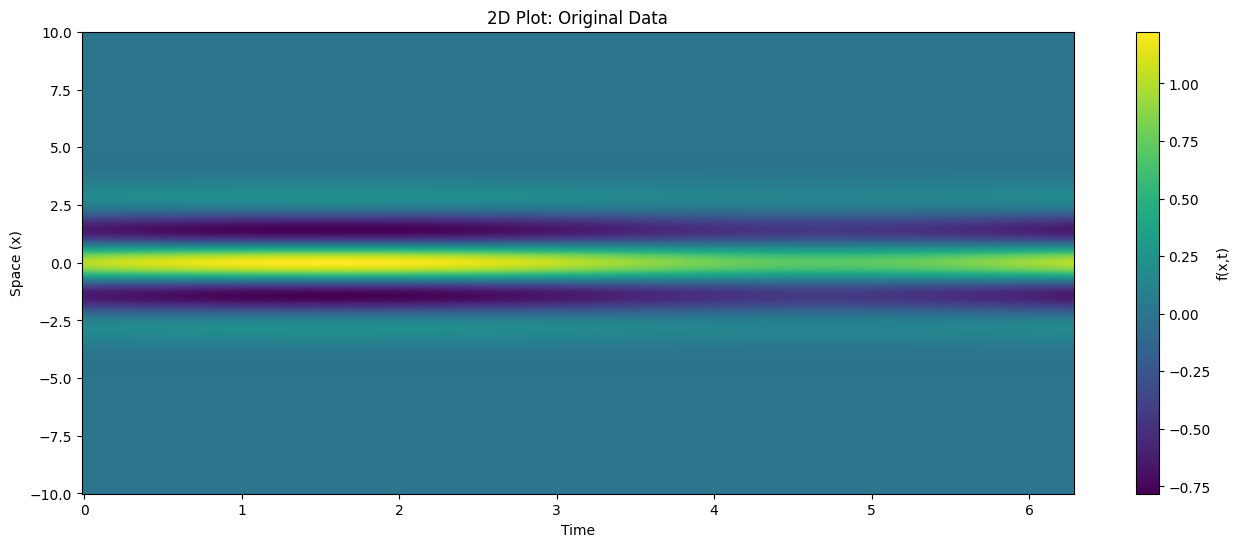

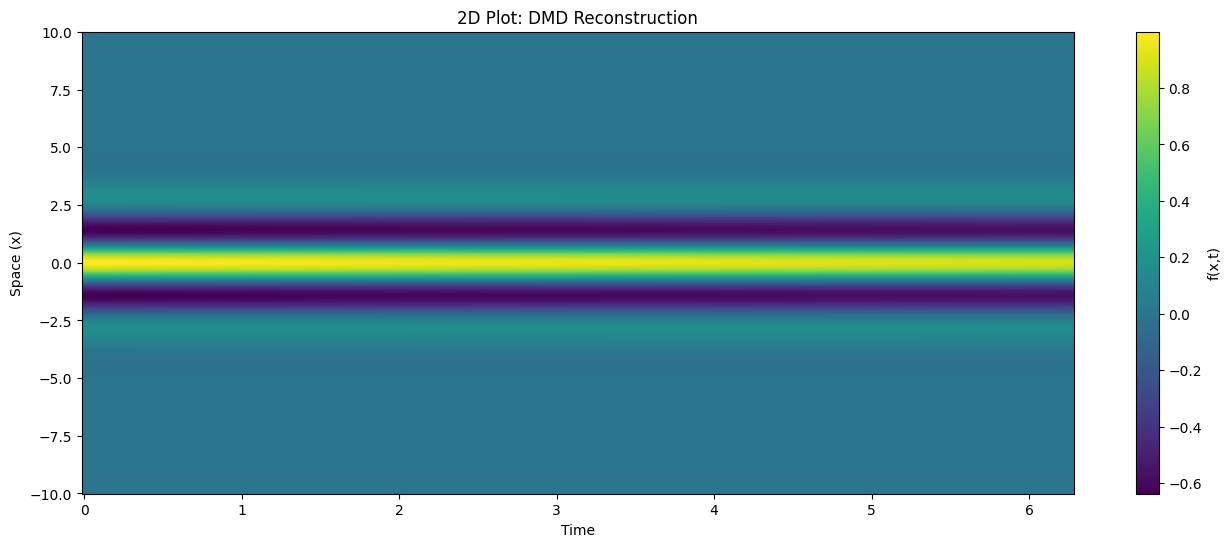

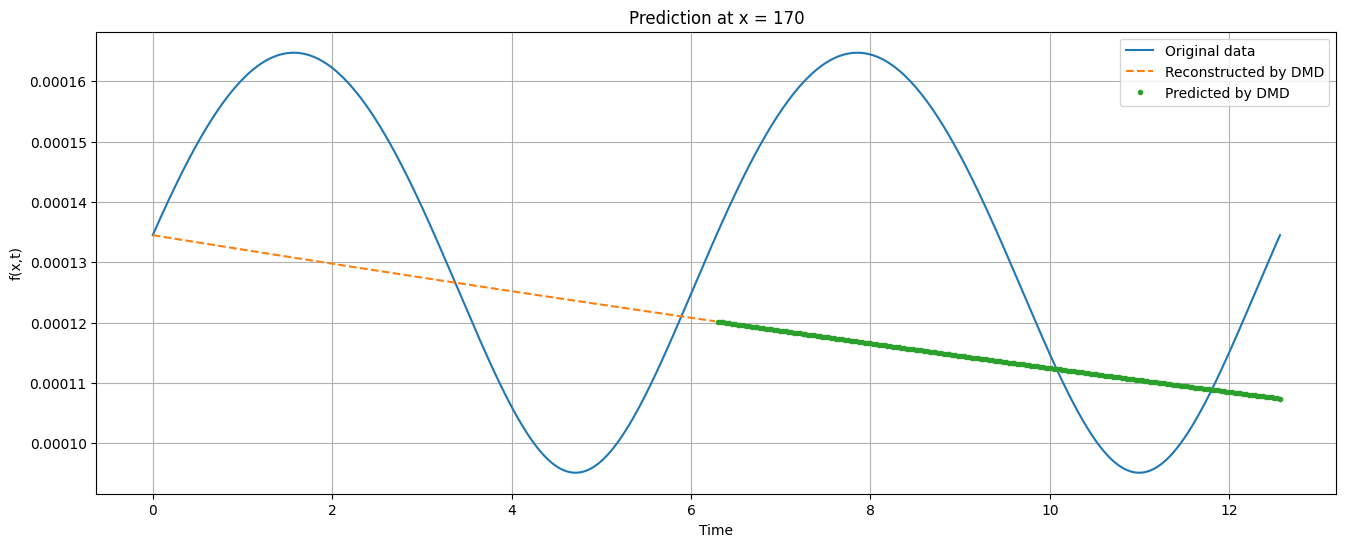

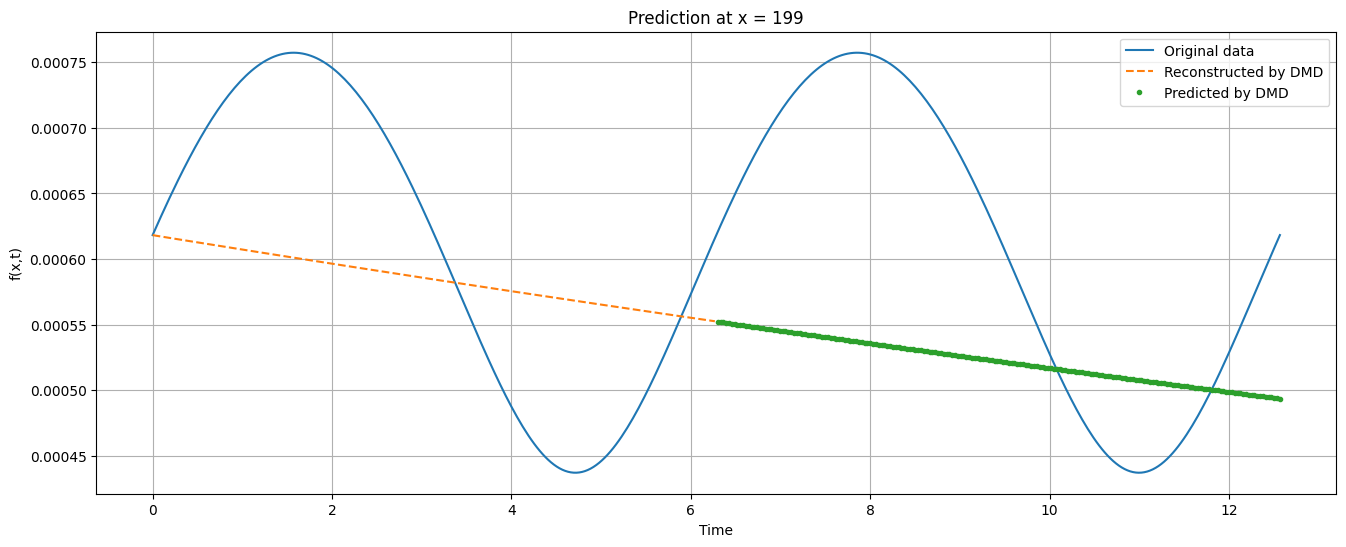

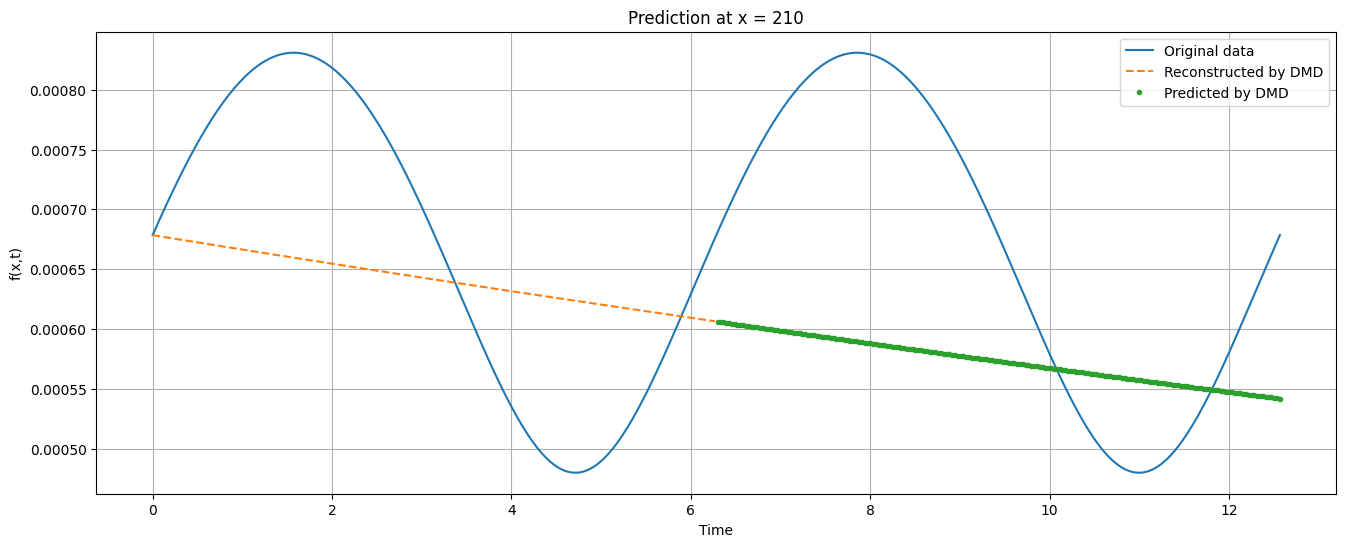

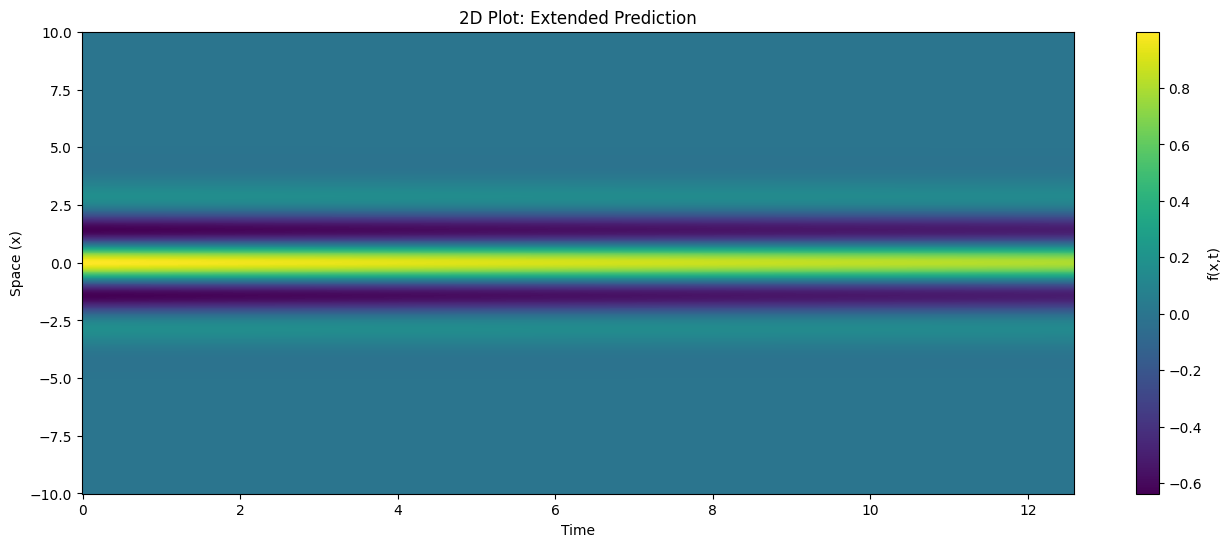

In [ ]:
results = hodmd(xi, t, f3, d=1, r=20)

In [ ]:
from pydmd import HODMD
dt = t[1] - t[0]
N_train = f3.shape[0] // 2
f_train = f3[:N_train]
t_train = t[:N_train]
# Fit model
hodmd_py = HODMD(svd_rank=10, d=50, exact=True)
hodmd_py.fit(f3)

# Reconstructed data
X_dmd_py = hodmd_py.reconstructed_data.real
# Call your custom HODMD function
results_custom = hodmd(xi=x, t=t, f=f3, d=100, r=100, show_plots=False)

# Extract reconstructed/predicted data
X_dmd_custom = results_custom["reconstruction"]
X_dmd_ext_custom = results_custom["prediction"]

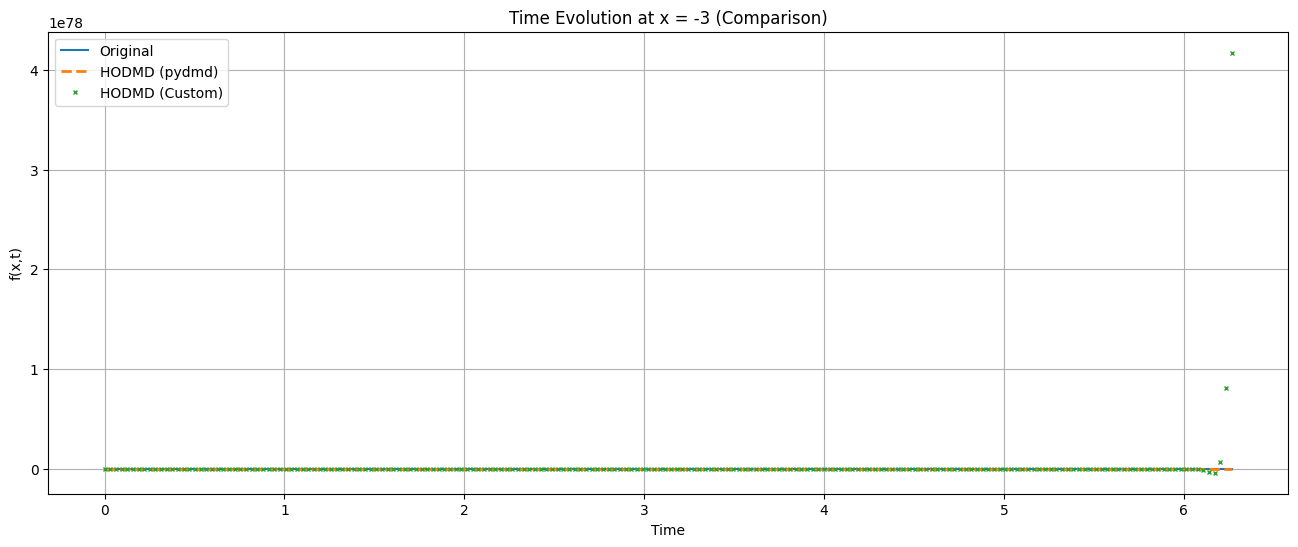

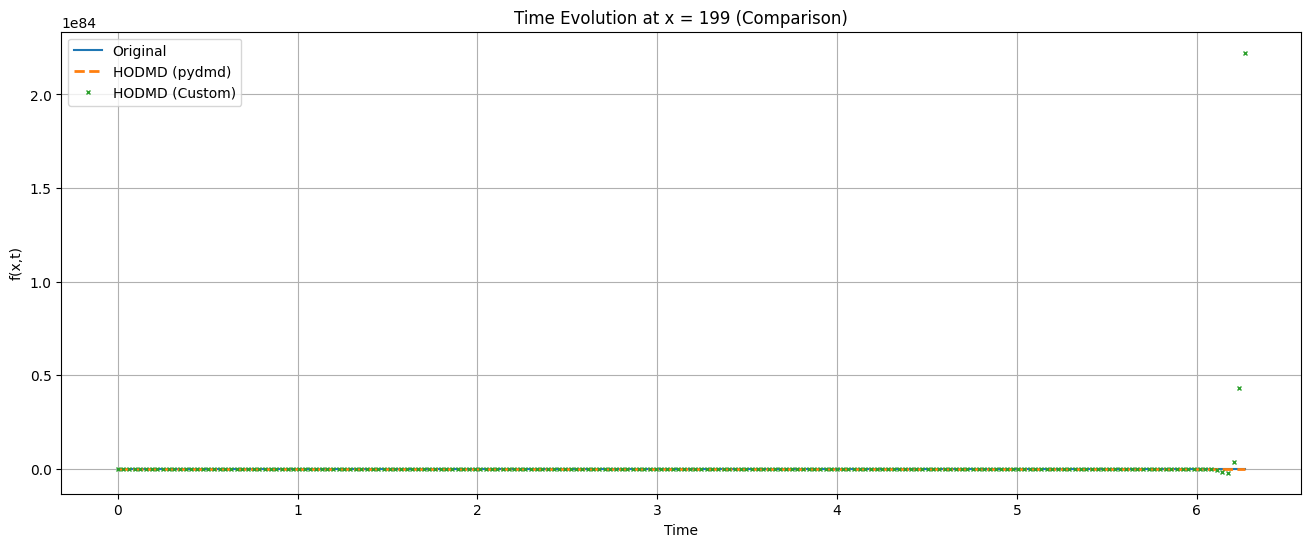

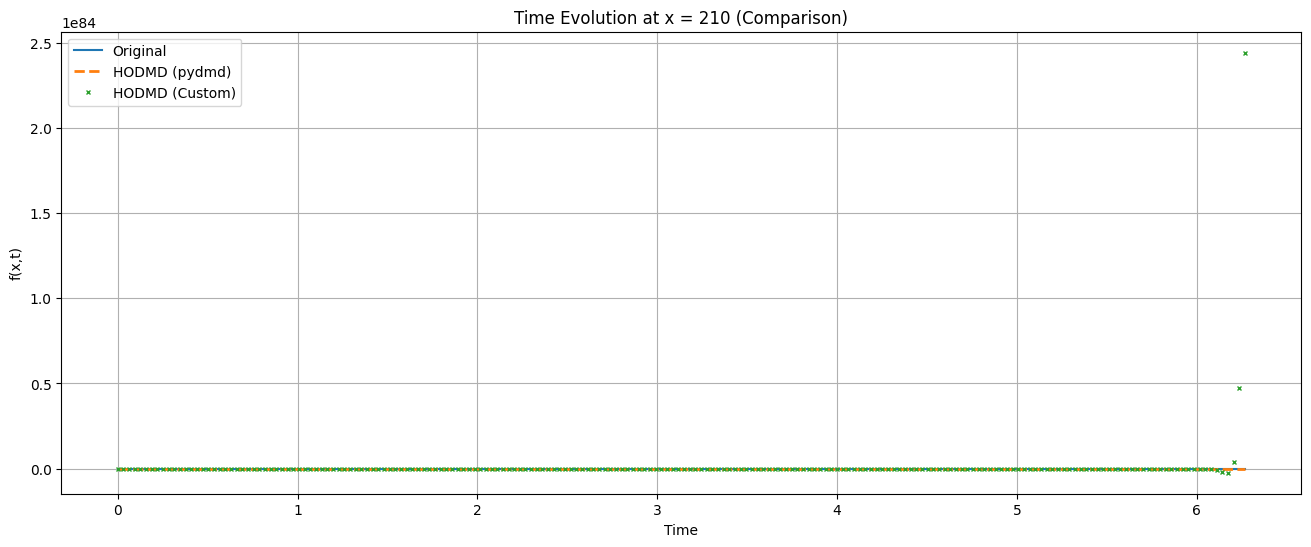

In [ ]:
def compare_time_series(t_train, xi, f_train, X_dmd_py, X_dmd_custom, indices):
    for idx in indices:
        plt.figure(figsize=(16, 6))
        plt.title(f"Time Evolution at x = {idx} (Comparison)")
        plt.plot(t_train, f_train[:, idx], label="Original")
        plt.plot(t_train, X_dmd_py[:len(t_train), idx], '--', lw=2, label="HODMD (pydmd)")
        plt.plot(t_train, X_dmd_custom[:, idx], 'x', ms=3, label="HODMD (Custom)")
        plt.legend()
        plt.grid(True)
        plt.xlabel("Time")
        plt.ylabel("f(x,t)")
        plt.show()
indices = [-3, 199, 210]
compare_time_series(t_train, x, f_train, X_dmd_py, X_dmd_custom, indices)


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import io 

# Load the data
data = io.loadmat('VORTALL.mat')
X = data['VORTALL']
X = X[:,:]

#Number of time frames
T = X.shape[1]
dt = 0.001*T
t = np.linspace(0, dt, T)

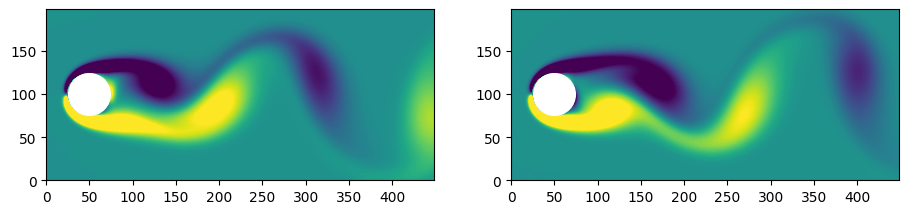

In [11]:

fig, ax= plt.subplots(1,2,figsize=(11, 4))

ax[0].contourf(np.real(np.reshape(X[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax[0].scatter(50,100,900,color='white', zorder=2) # draw cylinder
ax[0].set_aspect('equal')

ax[1].contourf(np.real(np.reshape(X[:,10],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax[1].scatter(50,100,900,color='white', zorder=2) # draw cylinder
ax[1].set_aspect('equal')

CPU times: user 8.03 s, sys: 18.2 s, total: 26.3 s
Wall time: 3.93 s


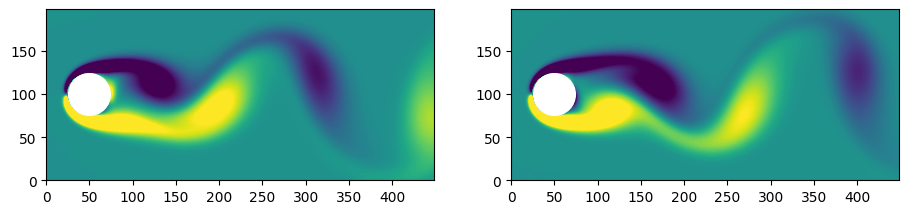

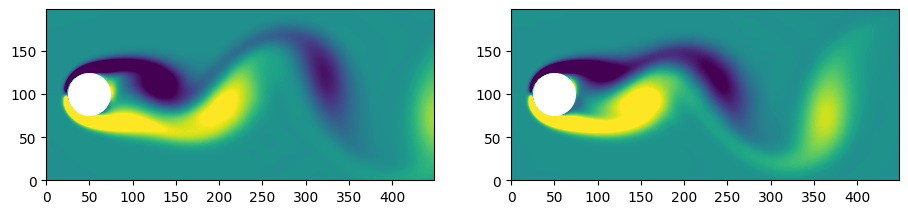

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def main():

    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    X = X[:, :100]
    T = X.shape[1]

    m = 199
    n = 499

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)
    ax[1].set_aspect('equal')

    # DMD algorthm Manrique
    

    # Data
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 11
    dt = T * 0.001

    # Call DMD
    Phi, omega, Lambda, alpha1, b, X_dmd, time_dynamics = DMD(X1, X2, DMD_rank, dt)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    # Plot DMD reconstructed
    ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X_dmd[:, 20], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

%time main()